<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/ITBD/trabajos2024/itbd_practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITBD - PRÁCTICA 1: Estudio de popularidad de canciones de Rock en Spotify
Trabajo realizado por:
 - Alejandro López
 - Noelia Luna

Dataset utilizado:
[14,400 Classic Rock Tracks (with Spotify)](https://www.kaggle.com/code/thebumpkin/classic-rock-tracks-exploration-notebook)

Hemos elegido este conjunto de datos porque cumple varias características que nos han parecido interesantes para este trabajo:
- Son datos tabulares
- Tiene muchas columnas (18) y filas (~14.400), como analizaremos en los siguientes apartados
- Cuenta con características de interés para datos musicales, en las que también profundizaremos

Estas características hacen que consideremos que este dataset puede ser muy interesante para el propósito de esta práctica: realizar un estudio de un dataset previo a su utilización en tareas de predicción.

In [ ]:
# @title Convertir cuaderno a PDF { display-mode: "form" }
# Colab2PDF v1.0.4 por Drengskapur (github.com/drengskapur/colab2pdf) (Licencia: GPL-3.0-or-later)

import ipywidgets as widgets
from IPython.display import display

def colab2pdf(button):
    print("Convirtiendo el cuaderno a PDF...")
    import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

    NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
    TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
    NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
    warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)

    with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy:
        nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)

    # Instalar Quarto si no está instalado
    if not pathlib.Path("/usr/local/bin/quarto").exists():
        !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet

    # Crear archivo de configuración para el PDF
    with (TEMP / "config.yml").open("w", encoding="utf-8") as file:
        yaml.dump({
            'include-in-header': [
                {"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}
            ],
            'include-before-body': [
                {"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}
            ]
        }, file)

    # Convertir a PDF usando Quarto
    !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet

    # Descargar el archivo PDF generado
    google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
    print("PDF generado y descargado.")

# Crear el botón
button = widgets.Button(description="Convertir a PDF")

# Asignar la función al botón
button.on_click(colab2pdf)

# Mostrar el botón
display(button)

Button(description='Convertir a PDF', style=ButtonStyle())

## IMPORTACION DESDE KAGGLE Y CARGA DE DATOS EN PANDAS

---



Comenzamos por descargar el dataset desde Kaggle para que esté disponible en este notebook. Para ello utilizamos la librería `opendatasets`, que reduce el proceso a una única lína.

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/thebumpkin/14400-classic-rock-tracks-with-spotify-data/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alg166
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/thebumpkin/14400-classic-rock-tracks-with-spotify-data


100%|██████████| 600k/600k [00:00<00:00, 98.2MB/s]

A continuación, importamos el csv para poder utilizarlo. Para este paso hemos decidio probar los diferentes motores que ofrece la función `read_csv` de la librería `pandas`. Al tratar de hacer una comparativa vemos que, en nuestro caso específico, el motor no es especialmente relevante porque hasta el más lento tarda tan solo una fracción de segundo.

In [ ]:
import pandas as pds
from time import time

file =(
    "/content/14400-classic-rock-tracks-with-spotify-data/UltimateClassicRock.csv"
)

lista_engines = ['c', 'pyarrow', 'python-fwf', 'python',]
lista_tiempos = []
for eng in lista_engines:
  t0 = time()
  df = pds.read_csv(file, engine=eng)
  t1 = time()
  lista_tiempos += [t1-t0]

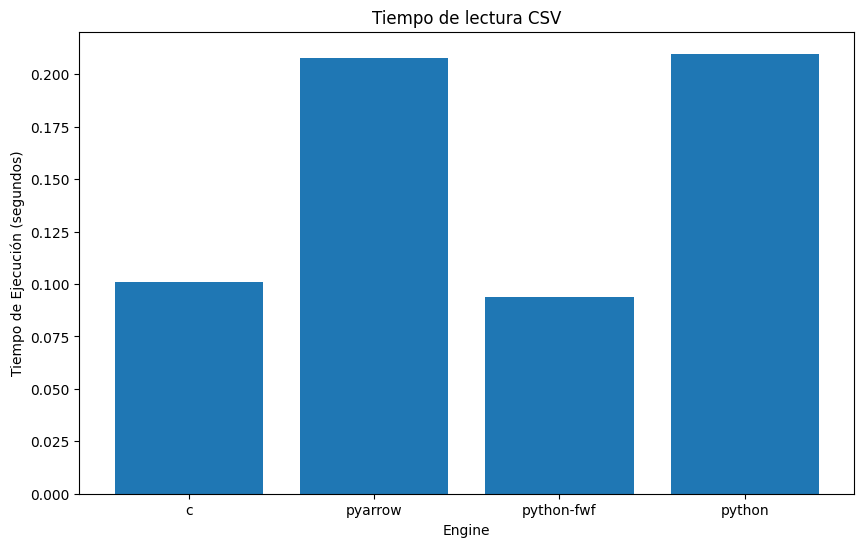

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(lista_engines, lista_tiempos)
plt.title('Tiempo de lectura CSV')
plt.xlabel('Engine')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.show()

# Descripción de las columnas del dataset:

1. **Track**: Nombre de la canción.
2. **Artist**: Nombre del artista o banda que interpreta la canción.
3. **Album**: Nombre del álbum al que pertenece la canción.
4. **Year**: Año de lanzamiento de la canción o álbum.
5. **Duration**: Duración de la canción, representada como una cadena en formato "mm:ss" (minutos y segundos).
6. **Time_Signature**: Firma temporal de la canción, que indica el número de tiempos por compás. Ejemplos comunes son 4 (4/4), 3 (3/4), etc.
7. **Danceability**: Medida de lo bailable que es la canción. Se basa en una combinación de elementos como el tempo, la estabilidad del ritmo y la regularidad. El valor varía de 0 a 1.
8. **Energy**: Medida de la intensidad y actividad percibida en la canción. Canciones con altos niveles de energía suelen ser rápidas, ruidosas y con fuertes acentos.
9. **Key**: Tono de la canción, representado como un número entero que va de 0 a 11. Cada número corresponde a una nota musical.
10. **Loudness**: Nivel de volumen medio de la canción, medido en decibelios (dB). Un valor negativo indica un menor volumen.
11. **Mode**: Modo de la canción, que puede ser mayor (1) o menor (0).
12. **Speechiness**: Indica la cantidad de palabras habladas en la pista. Valores más altos sugieren una mayor presencia de palabras habladas en comparación con cantadas.
13. **Acousticness**: Medida de cuán acústica es la canción. Un valor más alto indica que la canción tiene menos elementos eléctricos o sintéticos.
14. **Instrumentalness**: Predice si una canción no contiene voces. Cuanto más alto sea el valor, más probable es que la pista no contenga contenido lírico.
15. **Liveness**: Detecta la presencia de una audiencia en la grabación. Valores más altos indican una mayor probabilidad de que la canción se grabó en vivo.
16. **Valence**: Medida de la positividad musical. Canciones con altos valores de valencia suenan más felices, alegres o eufóricas.
17. **Tempo**: Tempo estimado de la canción en pulsos por minuto (BPM).
18. **Popularity**: Popularidad de la canción en Spotify, representada por un valor de 0 a 100. Un valor más alto indica mayor popularidad.


In [ ]:
df.head()

Track      Artist       Album  Year Duration  \
0      Play A Simple Song  38 Special  38 Special  1977     3:13   
1             Four Wheels  38 Special  38 Special  1977     4:43   
2                Fly Away  38 Special  38 Special  1977     5:13   
3          Tell Everybody  38 Special  38 Special  1977     4:09   
4  Just Wanna Rock & Roll  38 Special  38 Special  1977     5:57   

   Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0               4         0.521   0.367    0   -13.866     1       0.0278   
1               4         0.535   0.710    2   -12.287     1       0.0428   
2               4         0.563   0.563    2   -10.781     1       0.0263   
3               4         0.638   0.694   11   -10.206     0       0.0310   
4               4         0.388   0.701    2    -9.984     1       0.0360   

   Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  
0        0.6920          0.000003    0.1080    0.789   83.412          16  
1        0.0100          0.023000    0.0495    0.445  160.361          10  
2        0.0357          0.001850    0.1400    0.564  106.739          13  
3        0.1610          0.000034    0.0908    0.936  124.962          10  
4        0.0130          0.042200    0.1150    0.769  126.769          11

# PREPARACIÓN PREVIA DEL DATASET

Como la columna de duración de la canción está guardada como un string de formato mm:ss, creamos una columna nueva adyacente a la que llamaremos Duration_int que exprese la duración en segundos:

In [ ]:
#@title Procesado de la columna Duration
Duration_int = []
for time in df["Duration"]:
  minutes = int(time.split(":")[0])
  seconds = int(time.split(":")[1])
  Duration_int.append(minutes*60+seconds)

df.insert(loc = 5,
          column = 'Duration_int',
          value = Duration_int)

df.head()

Track      Artist       Album  Year Duration  \
0      Play A Simple Song  38 Special  38 Special  1977     3:13   
1             Four Wheels  38 Special  38 Special  1977     4:43   
2                Fly Away  38 Special  38 Special  1977     5:13   
3          Tell Everybody  38 Special  38 Special  1977     4:09   
4  Just Wanna Rock & Roll  38 Special  38 Special  1977     5:57   

   Duration_int  Time_Signature  Danceability  Energy  Key  Loudness  Mode  \
0           193               4         0.521   0.367    0   -13.866     1   
1           283               4         0.535   0.710    2   -12.287     1   
2           313               4         0.563   0.563    2   -10.781     1   
3           249               4         0.638   0.694   11   -10.206     0   
4           357               4         0.388   0.701    2    -9.984     1   

   Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
0       0.0278        0.6920          0.000003    0.1080    0.789   83.412   
1       0.0428        0.0100          0.023000    0.0495    0.445  160.361   
2       0.0263        0.0357          0.001850    0.1400    0.564  106.739   
3       0.0310        0.1610          0.000034    0.0908    0.936  124.962   
4       0.0360        0.0130          0.042200    0.1150    0.769  126.769   

   Popularity  
0          16  
1          10  
2          13  
3          10  
4          11

## DIMENSIONES DEL CONJUNTO DE DATOS (SHAPE)

Con la siguiente línea vemos que nuestro dataset consta de 14418 datos y 18 columnas de información (19, contando la que hemos añadido nosotros).

In [ ]:
df.shape

(14418, 19)

## COLUMNAS DE DATOS

In [ ]:
#@title Resumen por columnas y datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             14418 non-null  object 
 1   Artist            14418 non-null  object 
 2   Album             14418 non-null  object 
 3   Year              14418 non-null  int64  
 4   Duration          14418 non-null  object 
 5   Duration_int      14418 non-null  int64  
 6   Time_Signature    14418 non-null  int64  
 7   Danceability      14418 non-null  float64
 8   Energy            14418 non-null  float64
 9   Key               14418 non-null  int64  
 10  Loudness          14418 non-null  float64
 11  Mode              14418 non-null  int64  
 12  Speechiness       14418 non-null  float64
 13  Acousticness      14418 non-null  float64
 14  Instrumentalness  14418 non-null  float64
 15  Liveness          14418 non-null  float64
 16  Valence           14418 non-null  float6

Observamos que no hay valores nulos en nuestros datos.

In [ ]:
#@title Valores a cero
zero_counts = (df == 0).sum()

print(zero_counts)

Track                  0
Artist                 0
Album                  0
Year                   0
Duration               0
Duration_int           0
Time_Signature         7
Danceability           6
Energy                 1
Key                 1893
Loudness               0
Mode                3891
Speechiness            6
Acousticness           1
Instrumentalness    2035
Liveness               1
Valence                7
Tempo                  6
Popularity            41
dtype: int64


La mayoría de valores 0 son de categorías representadas con este valor. En los casos en los que se valora con 0 una cualidad, es lógico y no una pérdida de información (p.ej la obertura del titanic se considera nada bailable).

Al no tener valores a cero no-significativo ni valores nulos, no tenemos datos que imputar.

In [ ]:
#@title Categorías a 0

# Función para imprimir filas con valores cero
# Formateo automático de hashes por si añadimos más variables a listar
def print_zero_values(df, column, title):
    print("#" * (len(title) + 6))
    print(f"#  {title}  #")
    print("#" * (len(title) + 6))
    zero_rows = df[df[column] == 0]
    for index, row in zero_rows.iterrows():
      print(f" - Index: {index}, Track: {row['Track']} ({row['Artist']})")
    print("\n")  # Espacio al final para separar las secciones

# Imprimir las filas con 0's en Danceability
print_zero_values(df, "Danceability", "0 Danceability --> Nada bailables")

# Imprimir las filas con 0's en Popularity
print_zero_values(df, "Popularity", "0 Popularity --> Impopulares")

# Imprimir las filas con 0's en Speechiness
print_zero_values(df, "Speechiness", "0 Speechiness --> Instrumentales")


#######################################
#  0 Danceability --> Nada bailables  #
#######################################
 - Index: 536, Track: Titanic Overture (Alice Cooper)
 - Index: 7430, Track: Nutopian International Anthem - Remastered 2010 (John Lennon)
 - Index: 8198, Track: LA Drone - Live 1972; Remaster (Led Zeppelin)
 - Index: 10519, Track: Convict (Queensryche)
 - Index: 12205, Track: Electro Lux Imbroglio (Steve Miller Band)
 - Index: 13447, Track: Miracle Cure (The Who)


##################################
#  0 Popularity --> Impopulares  #
##################################
 - Index: 2176, Track: I Just Like to Be Bad (Blue Oyster Cult)
 - Index: 2178, Track: Dance on Stilts (Blue Oyster Cult)
 - Index: 2183, Track: One Step Ahead of the Devil (Blue Oyster Cult)
 - Index: 3497, Track: Introduction - 2002 Remaster (Chicago)
 - Index: 3903, Track: Segue - Nathan Adler - Version #2 (David Bowie)
 - Index: 4154, Track: Strange Kind of Woman (Live in Alborg) (Deep Purple)
 - In

In [ ]:
#@title Duplicados
# Encuentra todas las filas duplicadas (excluyendo la primera aparición)
duplicados = df[df.duplicated()]

# Muestra los duplicados encontrados
duplicados


Empty DataFrame
Columns: [Track, Artist, Album, Year, Duration, Duration_int, Time_Signature, Danceability, Energy, Key, Loudness, Mode, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Popularity]
Index: []

No existen filas duplicadas en nuestro dataset, con lo que no es necesario su tratamiento.

## Estudio de columnas problemáticas

Antes de proceder con el análisis de los datos queremos estudiar un par de columnas que, por los conceptos músicales que reprensentan y el tipo de datos que se ha elegido para guardarlos, creemos que pueden ser problemáticas.

In [ ]:
#@title Time signature occurences
df["Time_Signature"].value_counts().sort_index()

Time_Signature
0        7
1       79
3     1014
4    13224
5       94
Name: count, dtype: int64

In [ ]:
for ind, row in df.loc[:,["Track", "Time_Signature"]].iterrows():
  if row["Time_Signature"] == 0:
    print(row)
    break

Track             Titanic Overture
Time_Signature                   0
Name: 536, dtype: object


La medida de tiempo, según el creador del dataset, debería representar el número de negras que caben en un compás, siendo un `Time_Signature` de 4 representativo de que la obra está escrita como 4/4. El 0/4, sin embargo, no existe.

Al escuchar una obra que el dataset define como de 0/4 descubrimos que es, realmente, un 4/4. De hecho, las que hemos comprobado de otras medidas de tiempo también son 4/4. Algunas, excepcionalmente, tienen algún compás suelto en otra medida.

Además, elegir la representación de únicamente el número de arriba de las métricas de compás hace que sea imposible representar medidas que no tengan como unidad de tiempo la negra, como pueda ser el 6/8. Esto puede ser menos problemático que las características mencionadas en los párrafos anteriores, ya que es poco habitual encontrar estos tiempos en música rock, pop u otros géneros músicales que puedan ser carne de radio.

Por tanto, dado que es poco fiable y que más del 90% de las obras tienen el mismo compás, vamos a descartar esta característica para nuestro análisis.

In [ ]:
#@title Key occurences
df["Key"].value_counts().sort_index()

Key
0     1893
1      648
2     2283
3      313
4     1492
5     1024
6      535
7     1938
8      490
9     2369
10     529
11     904
Name: count, dtype: int64

El valor de `Key` representa en qué tonalidad está la canción, teniendo en cuenta solo la nota. Por ejemplo, si una canción está en Do Mayor el valor de `Key` será 0 (que representa la nota Do) y `Mode` será 1 (que representa Mayor).

Sin embargo, el que solo hayan 11 características nos hace pensar que han agrupado notas homófonas (es decir, Do# y Re*b*) en una misma categoría de la siguiente forma:

- 0: Do
- 1: Do# / Re*b*
- 2: Re
- 3: Re# / Mi*b*
- 4: Mi
- 5: Mi# / Fa
- 6: Fa# / Sol*b*
- 7: Sol
- 8: Sol# / La*b*
- 9: La
-10: La# / Si*b*
-11: Si

Sin embargo, esta agrupación no es correcta. Por ejemplo, las armaduras de las tonalidades Do# Mayor y Re*b* Mayor no tienen nada que ver, como vemos a continuación:

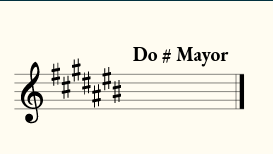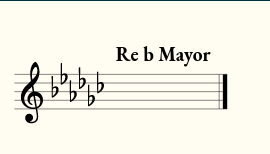

Por tanto, al ser esta clasificación incorrecta, descartaremos también esta característica para nuestro análisis.


## EXPLICACIÓN VISUAL DE LOS DATOS

In [ ]:
#@title Matriz de correlación
corr = df.drop(["Track", "Artist", "Album", "Duration"], axis=1).corr()
corr

Year  Duration_int  Time_Signature  Danceability  \
Year              1.000000      0.086542       -0.002601      0.029797   
Duration_int      0.086542      1.000000        0.011255     -0.151187   
Time_Signature   -0.002601      0.011255        1.000000      0.137758   
Danceability      0.029797     -0.151187        0.137758      1.000000   
Energy            0.234906      0.078902        0.175211      0.009739   
Key               0.008447      0.002278        0.000523      0.012352   
Loudness          0.373410      0.078085        0.115915      0.022443   
Mode             -0.058380     -0.083377        0.003156      0.014233   
Speechiness      -0.009139     -0.007629        0.000988     -0.104989   
Acousticness     -0.171830     -0.125746       -0.144325     -0.017673   
Instrumentalness -0.067702      0.028605       -0.024815     -0.163172   
Liveness          0.011397      0.048309       -0.011415     -0.167926   
Valence          -0.156092     -0.199918        0.134031      0.507946   
Tempo            -0.012243     -0.020868       -0.022424     -0.160624   
Popularity       -0.233772      0.075842        0.018642     -0.010132   

                    Energy       Key  Loudness      Mode  Speechiness  \
Year              0.234906  0.008447  0.373410 -0.058380    -0.009139   
Duration_int      0.078902  0.002278  0.078085 -0.083377    -0.007629   
Time_Signature    0.175211  0.000523  0.115915  0.003156     0.000988   
Danceability      0.009739  0.012352  0.022443  0.014233    -0.104989   
Energy            1.000000  0.018662  0.761994 -0.037026     0.188441   
Key               0.018662  1.000000 -0.001479 -0.167821     0.023700   
Loudness          0.761994 -0.001479  1.000000 -0.009880     0.031783   
Mode             -0.037026 -0.167821 -0.009880  1.000000    -0.044685   
Speechiness       0.188441  0.023700  0.031783 -0.044685     1.000000   
Acousticness     -0.669985 -0.012441 -0.501768  0.043463    -0.048197   
Instrumentalness -0.079194  0.004043 -0.207757 -0.050104     0.004139   
Liveness          0.189752 -0.009384  0.098686  0.001378     0.135989   
Valence           0.309524  0.017792  0.135869  0.048773    -0.072543   
Tempo             0.186960  0.007395  0.116997  0.010335     0.104780   
Popularity       -0.014111 -0.014533 -0.003463 -0.019034    -0.008277   

                  Acousticness  Instrumentalness  Liveness   Valence  \
Year                 -0.171830         -0.067702  0.011397 -0.156092   
Duration_int         -0.125746          0.028605  0.048309 -0.199918   
Time_Signature       -0.144325         -0.024815 -0.011415  0.134031   
Danceability         -0.017673         -0.163172 -0.167926  0.507946   
Energy               -0.669985         -0.079194  0.189752  0.309524   
Key                  -0.012441          0.004043 -0.009384  0.017792   
Loudness             -0.501768         -0.207757  0.098686  0.135869   
Mode                  0.043463         -0.050104  0.001378  0.048773   
Speechiness          -0.048197          0.004139  0.135989 -0.072543   
Acousticness          1.000000          0.108103 -0.074437 -0.208210   
Instrumentalness      0.108103          1.000000  0.045915 -0.091231   
Liveness             -0.074437          0.045915  1.000000 -0.040711   
Valence              -0.208210         -0.091231 -0.040711  1.000000   
Tempo                -0.138945         -0.042039  0.010906  0.114292   
Popularity            0.013512         -0.036204 -0.047939  0.015726   

                     Tempo  Popularity  
Year             -0.012243   -0.233772  
Duration_int     -0.020868    0.075842  
Time_Signature   -0.022424    0.018642  
Danceability     -0.160624   -0.010132  
Energy            0.186960   -0.014111  
Key               0.007395   -0.014533  
Loudness          0.116997   -0.003463  
Mode              0.010335   -0.019034  
Speechiness       0.104780   -0.008277  
Acousticness     -0.138945    0.013512  
Instrumentalness -0.042039   -0.036204  
Liveness          0.010

Calculamos la matriz de correlación mediante el método Pearson, que es el que utiliza la función `.corr()` por defecto.

Para ello quitamos las columnas de texto, ya que no podemos aplicar sobre estas la fórmula matemática.

Para una mejor visualización, vamos a representar la matriz de correlación mediante un mapa de calor a continuación:

<Axes: >

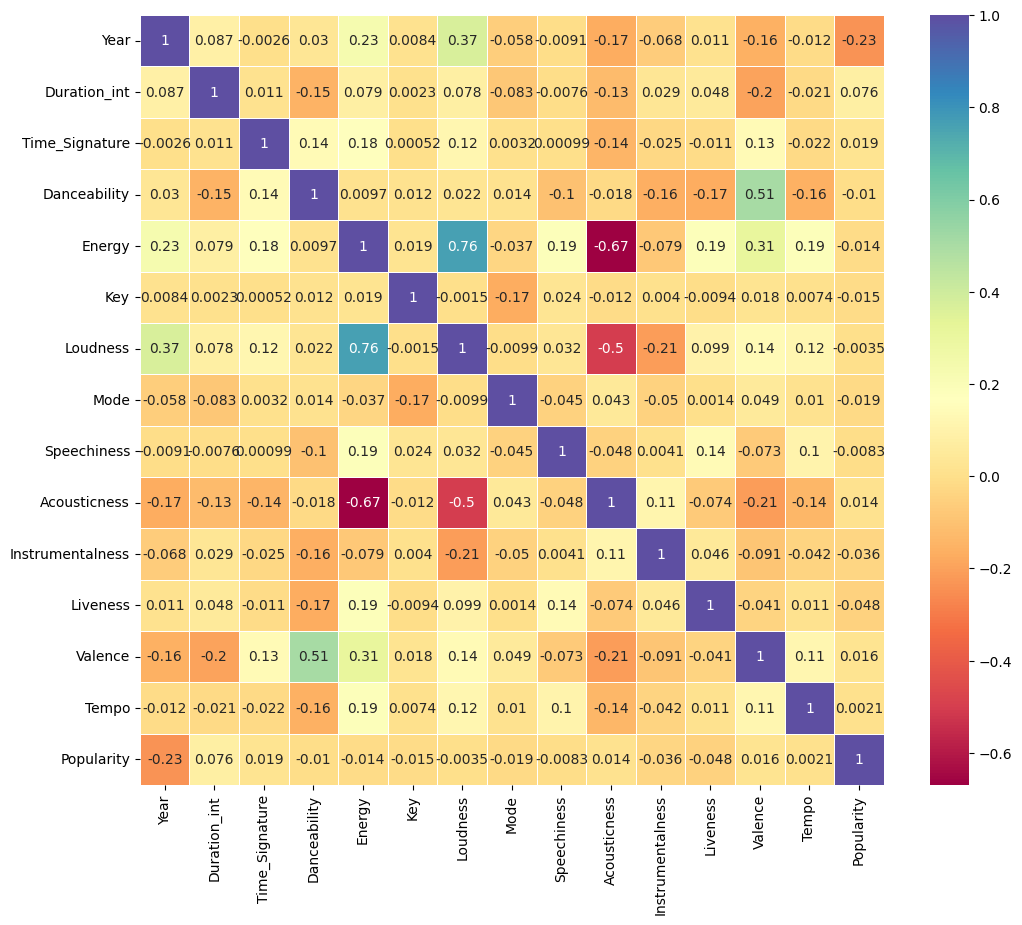

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='Spectral', linewidths=0.5)

### Explicación de la diagonal unitaria en la Matriz de Correlación

La matriz de correlación mide la relación entre diferentes variables en el dataset. Los valores de la matriz oscilan entre -1 y 1:

- Un valor de **1** indica una correlación positiva perfecta, es decir, cuando una variable aumenta, la otra también lo hace en la misma proporción.
- Un valor de **-1** indica una correlación negativa perfecta, donde una variable aumenta mientras la otra disminuye en la misma proporción.
- Un valor de **0** indica que no hay correlación lineal entre las variables.

#### ¿Por qué la diagonal es 1?
La diagonal principal de la matriz de correlación siempre es 1, ya que representa la correlación de cada variable consigo misma. Matemáticamente, cualquier variable tiene una correlación perfecta consigo misma, por lo que el valor siempre es 1. Por ejemplo:

- La correlación entre la variable `Danceability` y `Danceability` es 1.
- La correlación entre la variable `Energy` y `Energy` también es 1.

Estos valores en la diagonal nos indican que la matriz se ha calculado correctamente, ya que cada variable está perfectamente correlacionada consigo misma, como es lógico.


### Correlaciones más destacadas en la Matriz de Correlación

Vamos a destacar aquellas que tienen valores absolutos más cercanos a 1, ya sea en positivo o en negativo. Las correlaciones más fuertes que observamos son las siguientes:

#### Correlaciones postivias más destacadas
1. **Energy y Loudness**: 0.76
   - Indica que las canciones con mayor energía tienden a tener un mayor nivel de volumen.
   
2. **Valence y Danceability**: 0.51
   - Canciones con un valor más alto de positividad (valence) suelen ser más bailables.

#### Correlaciones negativas más destacadas
1. **Acousticness y Energy**: -0.67
   - Canciones con alta energía tienden a tener bajos valores de acousticness, es decir, tienen menos elementos acústicos y más electrónicos o amplificados.

2. **Acousticness y Loudness**: -0.50
   - Canciones con un mayor nivel de volumen suelen tener menos elementos acústicos.
  
3. **Popularity y Year**: -0.23
   - Aunque no sea de los valores más altos, destacamos esta relación ya que es la que tiene un valor absoluto más alto para la variable `popularity`, que será la que trataremos de predecir al final de esta práctica.

Con esos valores, estas correlaciones nos ayudan a entender mejor cómo interactúan las diferentes características del dataset y cómo ciertos aspectos de la música rock clásica se relacionan entre sí.


### Correlación de variables descartadas
Queremos resaltar especialmente en que la correlación entre las variables que hemos descartado por imprecisas (Time_Signature y Key) y cualquier otra variable, pero especialmente la popularidad, es bastante baja. Esto nos indica que no perdemos mucha información al descartarlas.

## GRÁFICAS DE LAS CORRELACIONES POSITIVAS Y NEGATIVAS MÁS DESTACADAS

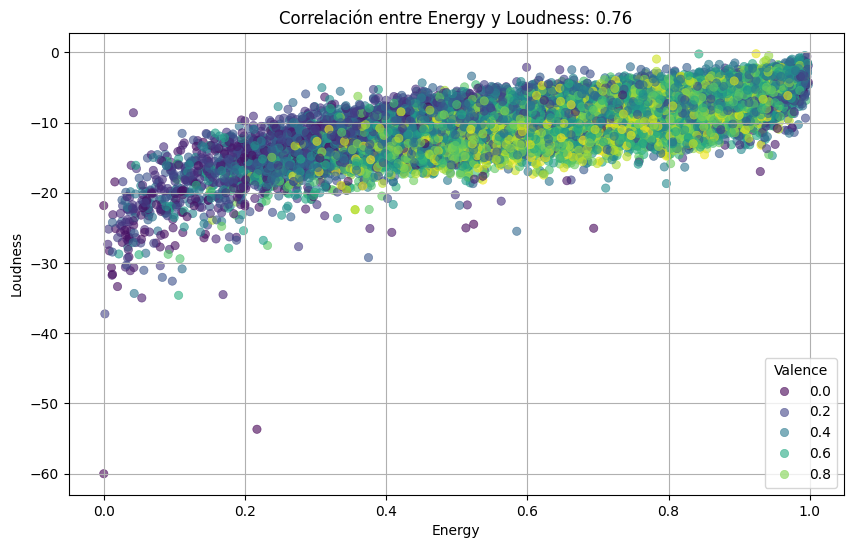

In [ ]:
# PLOTEO de Energy y Loudness: 0.76
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión (scatter plot) entre Energy y Loudness, y usando Valence para el hue,
# como medida de la felicidad/tristeza que transmite la canción en relación a
# la energía y volumen
sns.scatterplot(x='Energy', y='Loudness', data=df, hue='Valence', palette='viridis', alpha=0.6, edgecolor=None)

# Título y etiquetas del gráfico
plt.title('Correlación entre Energy y Loudness: 0.76')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.grid(True)

# Mostrar el gráfico
plt.show()

### INTERPRETACIÓN DE LA GRÁFICA 'Correlación entre Energy y Loudness: 0.76':
1. Tendencia ascendente, por lo que a medida que aumenta el nivel de `Energy` también lo hace el nivel de `Loudness`. Parece obvio.
2. La mayoría de los puntos están en la parte alta y derecha de la gráfica, lo cual también es obvio teniendo en cuenta que las canciones rock tienen valores altos tanto en `Energy` como en `Loudness`. Pocas canciones tienen valores bajos.
3. **Distribución de Valence**:
   - Los puntos con tonos más amarillos (valores altos de `Valence`) indican canciones que transmiten felicidad o positivismo.
   - Los puntos con tonos más morados (valores bajos de `Valence`) corresponden a canciones más tristes o negativas.
4. **Relación entre `Valence`, `Energy` y `Loudness`**:
   - A medida que aumenta `Energy` y `Loudness`, se observan más canciones con valores altos de `Valence` (verde y amarillo), lo que sugiere que las canciones más energéticas y ruidosas tienden a ser más positivas.
   - Sin embargo, también hay canciones con alta energía y volumen que tienen bajos valores de `Valence` (morado), lo que indica que no todas las canciones energéticas son necesariamente "felices".
5. **Rango de `Valence` en Valores Bajos de `Energy` y `Loudness`**:
   - En la parte inferior izquierda (baja energía y volumen), los puntos se concentran más en los tonos morados, lo que refleja que muchas canciones tranquilas y con menor volumen son percibidas como tristes o negativas. Esto también parece obvio.






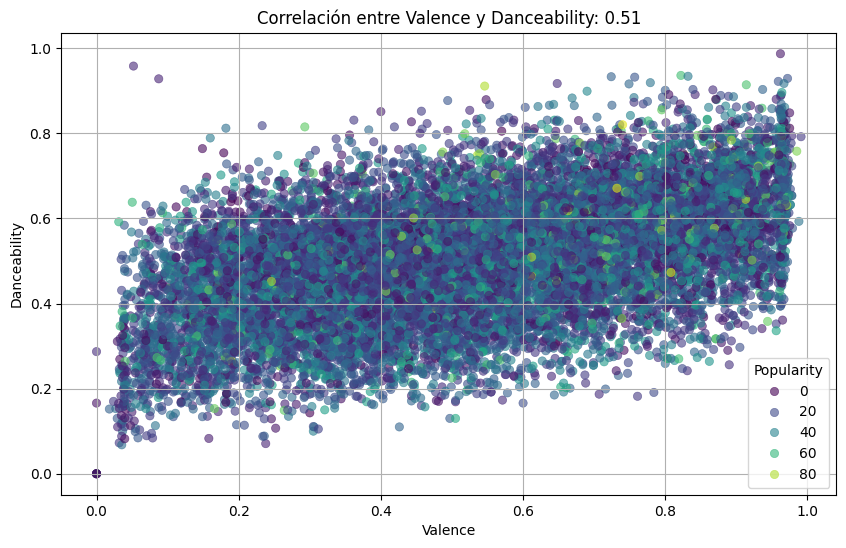

In [ ]:
# PLOTEO de Valence y Danceability: 0.51
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión (scatter plot) entre Valence y Danceability, y usando Popularity para las canciones más o menos populares
sns.scatterplot(x='Valence', y='Danceability', data=df, hue='Popularity', palette='viridis', alpha=0.6, edgecolor=None)

# Título y etiquetas del gráfico
plt.title('Correlación entre Valence y Danceability: 0.51')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.grid(True)

# Mostrar el gráfico
plt.show()


### INTERPRETACIÓN DE LA GRÁFICA 'Correlación entre Valence y Danceability: 0.51':
1. Tendencia ascendente, por lo que a medida que aumenta el nivel de `Valence` también lo hace el nivel de `Danceability`. Tiene sentido que, cuanto más alegre suene una canción, más bailable resulte.
2. Hay valores para casi el rango entero de ambas métricas. También encaja, ya que hay canciones de rock más alegres y otras más tristes, como las baladas; igualmente, hay canciones que pueden resultar muy poco bailables.
3. **Distribución de Popularity**:
   - Vemos que los puntos más amarillos (valores altos de `Popularity` se encuentran distribuidos por casi toda la gráfica, pero en general con canciones que tengan un valor de `Danceability` mayor a 0'4.
   - Parece que también se concentran un poco más hacia los valores de `Valence` más altos.
4. **Rango de valores de Danceability por Valence**:
   - La función se asemeja a una distribución linear, pero el rango de valores de `Danceability` para cada `Valence` es bastante grande. Esto nos indica que canciones con un mismo tono más o menos alegre pueden resultar más o menos bailable.
   - De esto podemos inferir que la valencia de una canción afecta a que sea bailable, pero no es el único parámetro que tiene relación con esta característica.

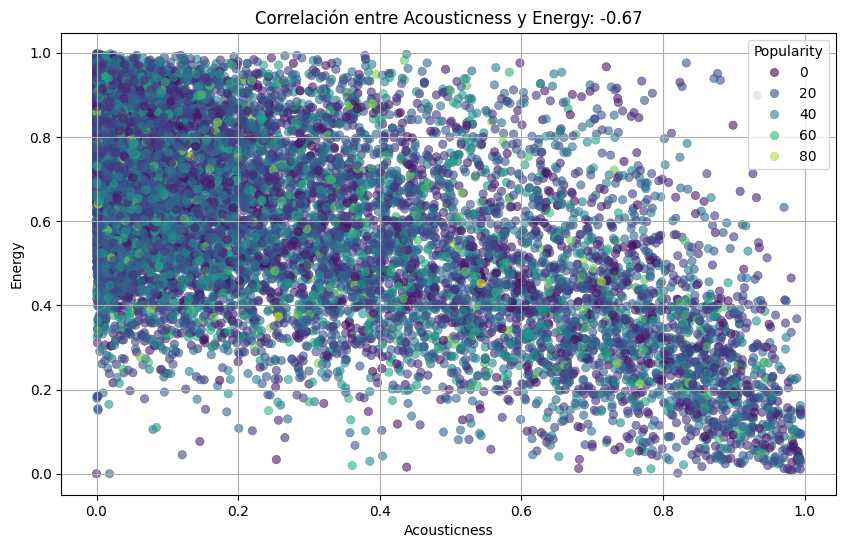

In [ ]:
# PLOTEO de Acousticness y Energy: -0.67
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión (scatter plot) entre Acousticness y Energy, y usando Popularity para las canciones más o menos populares
sns.scatterplot(x='Acousticness', y='Energy', data=df, hue='Popularity', palette='viridis', alpha=0.6, edgecolor=None)

# Título y etiquetas del gráfico
plt.title('Correlación entre Acousticness y Energy: -0.67')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.grid(True)

# Mostrar el gráfico
plt.show()


### INTERPRETACIÓN DE LA GRÁFICA 'Correlación entre Acousticness y Energy: -0.67':
1. Tendencia descendente: las obras acústicas tienden a ser menos enérgicas.
2. La tendencia es una curva descendente.
3. Los valores altos de `Acousticness` implican un valor bajo de `Energy`, pero canciones más instrumentadas no siempre implican un alto nivel de energía. Por eso la distribución es más ancha a valores bajos de `Acousticness` y converge más para los valores más altos.
4. Los valores de popularidad no muestran una tendencia clara con respecto a estas dos métricas.

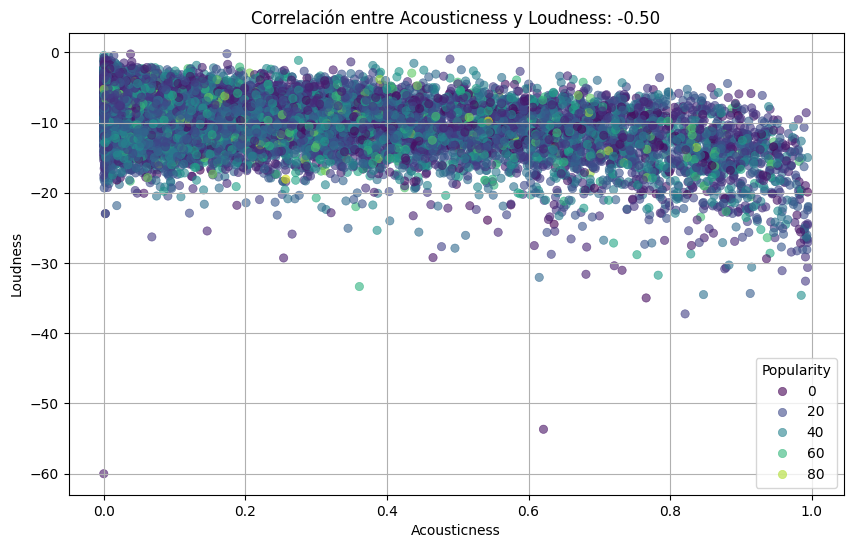

In [ ]:
# PLOTEO de Acousticness y Loudness: -0.50
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión (scatter plot) entre Acousticness y Loudness, y usando Popularity para las canciones más o menos populares
sns.scatterplot(x='Acousticness', y='Loudness', data=df, hue='Popularity', palette='viridis', alpha=0.6, edgecolor=None)

# Título y etiquetas del gráfico
plt.title('Correlación entre Acousticness y Loudness: -0.50')
plt.xlabel('Acousticness')
plt.ylabel('Loudness')
plt.grid(True)

# Mostrar el gráfico
plt.show()


### INTERPRETACIÓN DE LA GRÁFICA 'Correlación entre Acousticness y Loudness: -0.5':
1. Tendencia descendente: cuanto más acústica es una canción, menos ruidosa suele ser.
2. Vemos que, a excepción de un par de valores extremos (_outliers_), sigue una distribución bastante parecida a una línea recta. Hacia los valores más altos de `acousticness` rompe la tendencia linear para descender con más pendiente.
3. Como en la gráfica anterior, a simple vista no resalta que la popularidad siga un patrón visible relacionado con estas características.

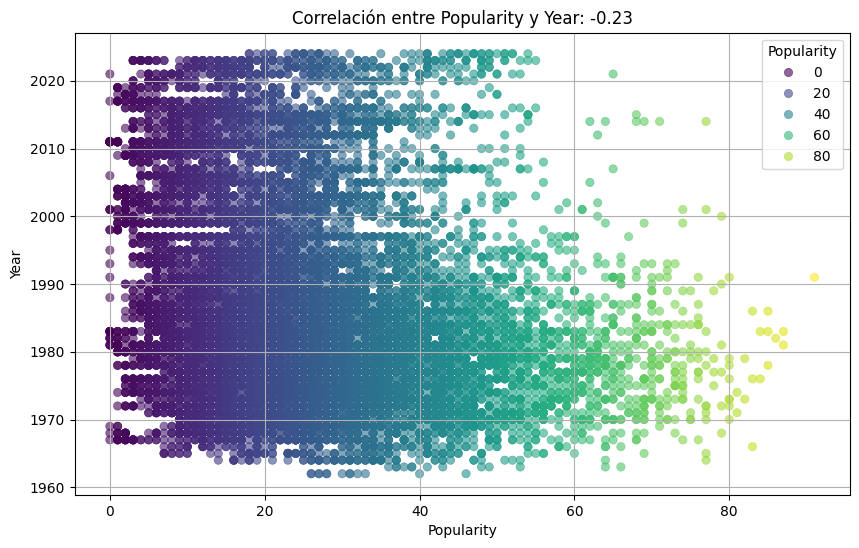

In [ ]:
# PLOTEO de Popularity y Year: -0.23
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión (scatter plot) entre Popularity y Year, y usando Popularity para las canciones más o menos populares
sns.scatterplot(x='Popularity', y='Year', data=df, hue='Popularity', palette='viridis', alpha=0.6, edgecolor=None)

# Título y etiquetas del gráfico
plt.title('Correlación entre Popularity y Year: -0.23')
plt.xlabel('Popularity')
plt.ylabel('Year')
plt.grid(True)

# Mostrar el gráfico
plt.show()

### INTERPRETACIÓN DE LA GRÁFICA 'Correlación entre Year y Popularity: -0.23':
1. En este caso, tanto el eye horizontal como la coloración de los puntos representa la característica `Popularity`.
2. Vemos que, a lo largo de los años, hay canciones con popularidad entre 0 y 60. Sin embargo. La inmensa mayoría de canciones que superan el 60 de `Popularity` son de los noventa o anteriores. Esto denota una cierta nostalgia en el género rock, la cual no debería sorprendernos.

## ANÁLISIS DE POPULARIDAD

### Por canción

In [ ]:
# Obtener las 10 canciones más populares
most_popular_songs = df.sort_values(by='Popularity', ascending=False)[['Track', 'Artist', 'Popularity']].head(25)
most_popular_songs

Track               Artist  \
9153                                             The One          Moody Blues   
7554                                Don't Stop Believin'              Journey   
13036                              Every Breath You Take           The Police   
13796                                             Africa                 Toto   
2787                                  Livin' On A Prayer             Bon Jovi   
1704                                         Uptown Girl           Billy Joel   
13778                                      Hold the Line                 Toto   
160                                        Dancing Queen                 ABBA   
5085                                  I'm Still Standing           Elton John   
2790                            You Give Love A Bad Name             Bon Jovi   
4699                                    Hotel California               Eagles   
13136                               Gimme Shelter - Live   The Rolling Stones   
7946                           I Was Made For Lovin' You                 Kiss   
222                                             Dream On            Aerosmith   
8615                                  Sweet Home Alabama       Lynyrd Skynyrd   
4931   Rocket Man (I Think It's Going To Be A Long, L...           Elton John   
14272                                          La Grange               ZZ Top   
175          Gimme! Gimme! Gimme! (A Man After Midnight)                 ABBA   
2958                                 More Than a Feeling               Boston   
2361                           Knockin' On Heaven's Door            Bob Dylan   
12990                                            Roxanne           The Police   
9154                                               Magic          Moody Blues   
12753                                Listen to the Music  The Doobie Brothers   
4895                                           Your Song           Elton John   
4660                                        Take It Easy               Eagles   

       Popularity  
9153           91  
7554           87  
13036          87  
13796          86  
2787           85  
1704           85  
13778          85  
160            84  
5085           84  
2790           83  
4699           83  
13136          83  
7946           82  
222            82  
8615           81  
4931           81  
14272          80  
175            80  
2958           80  
2361           80  
12990          80  
9154           80  
12753          80  
4895           80  
4660           79

Estás son las 25 canciones más populares, según nuestro dataset. No es de extrañar: todas ellas son clásicos muy reconocibles de la historia del rock, compuestos por artistas de renombre.

El número de canciones mostradas es arbitrario: hemos elegido 25 por ser lo suficientemente grande como para hacernos una idea de las canciones más populares del dataset sin que fueran tantos datos que la inspección manual resultara farragosa.

### Por artista

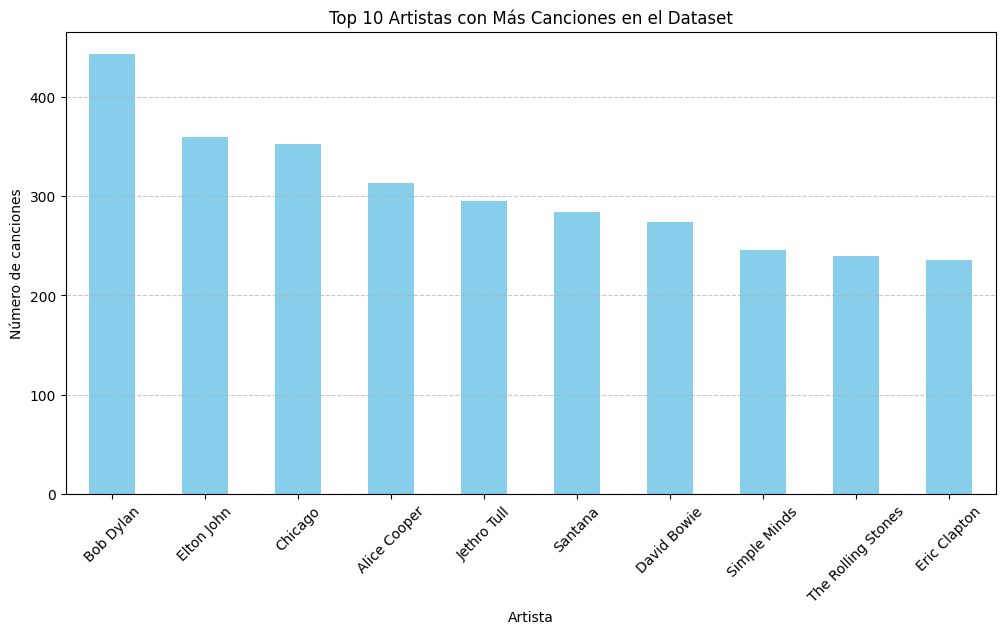

In [ ]:
# Contar el número de canciones por grupo
albums_per_artist = df.groupby('Artist')['Track'].nunique().sort_values(ascending=False).head(10)

# Crear un gráfico de barras para mostrar el número de canciones por grupo
plt.figure(figsize=(12, 6))
albums_per_artist.plot(kind='bar', color='skyblue')
plt.title('Top 10 Artistas con Más Canciones en el Dataset')
plt.xlabel('Artista')
plt.ylabel('Número de canciones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


A continuación estudiamos qué grupos y cantantes tienen más canciones en nuestro dataset, para comprobar si coinciden con los más populares.

Presentamos una lista de los cantantes más prolíferos que tienen canciones en el top 25, y el número de las mismas:
1. Bob Dylan - 1
2. Elton John - 3
9. Rolling Stones - 1

No parece haber una tendencia de que, a más canciones producidas, mayor popularidad consiguen.


In [ ]:
# Obtener la media de las características de cada grupo y obtener los 10 primeros ordenados por popularidad
caracteristicas_grupos = df.drop(columns=['Track', 'Album', 'Year', 'Duration']).groupby('Artist').mean().reset_index().sort_values(by='Popularity', ascending=False).head(10)
caracteristicas_grupos

Artist  Duration_int  Time_Signature  Danceability    Energy  \
84           The Police    226.000000        3.907407      0.586407  0.695463   
72  Simon And Garfunkel    159.655172        3.879310      0.444017  0.375847   
55            Metallica    373.226891        3.966387      0.413042  0.901479   
29               Eagles    259.404255        3.872340      0.544394  0.539741   
1                  ABBA    224.071429        3.901786      0.558732  0.651920   
74           Steely Dan    272.700000        3.975000      0.686875  0.478162   
63           Pink Floyd    281.141104        3.852761      0.384663  0.367094   
83            The Doors    212.090909        3.909091      0.526818  0.475953   
80           Supertramp    321.118644        3.915254      0.513373  0.549983   
26         Dire Straits    328.313725        3.980392      0.612706  0.554137   

         Key   Loudness      Mode  Speechiness  Acousticness  \
84  5.203704  -9.233759  0.592593     0.082219      0.111298   
72  5.706897 -14.557431  0.793103     0.052967      0.582486   
55  5.504202  -5.323454  0.571429     0.073418      0.002122   
29  5.000000  -9.564362  0.829787     0.035345      0.341131   
1   5.187500  -7.756696  0.892857     0.038599      0.379137   
74  4.550000 -12.657363  0.562500     0.043449      0.382118   
63  5.263804 -15.667190  0.717791     0.056453      0.452943   
83  4.787879 -13.238697  0.646465     0.089213      0.417641   
80  4.932203  -9.918780  0.593220     0.040929      0.411437   
26  4.980392 -11.659863  0.549020     0.036706      0.335788   

    Instrumentalness  Liveness   Valence       Tempo  Popularity  
84          0.112894  0.164430  0.653833  141.856389   48.037037  
72          0.041642  0.183388  0.538069  116.653138   46.017241  
55          0.124869  0.160475  0.411397  126.695244   45.521008  
29          0.067161  0.265337  0.550414  114.653021   44.585106  
1           0.033768  0.215333  0.642554  124.293804   43.830357  
74          0.035905  0.140166  0.694750  116.890075   43.287500  
63          0.385220  0.239917  0.233802  115.723902   43.085890  
83          0.090579  0.213196  0.599620  121.643101   42.898990  
80          0.013260  0.184178  0.444727  115.867729   40.220339  
26          0.247714  0.146578  0.587331  121.774647   39.490196

El siguiente estudio que se nos ocurre hacer es estudiar la popularidad y otras características que tienen de media los grupos más populares.

Vemos que el grupo que tiene una popularidad más alta de media entre todas sus canciones es The Police. Todos los grupos que encabezan esta tabla son, de nuevo, grandes nombres de la historia del género.

Nos fijamos además en que los grupos tienden a equilibrar la bailabilidad de sus canciones, y suelen tener valores bajos de `Speechiness` y `Acousticness`.

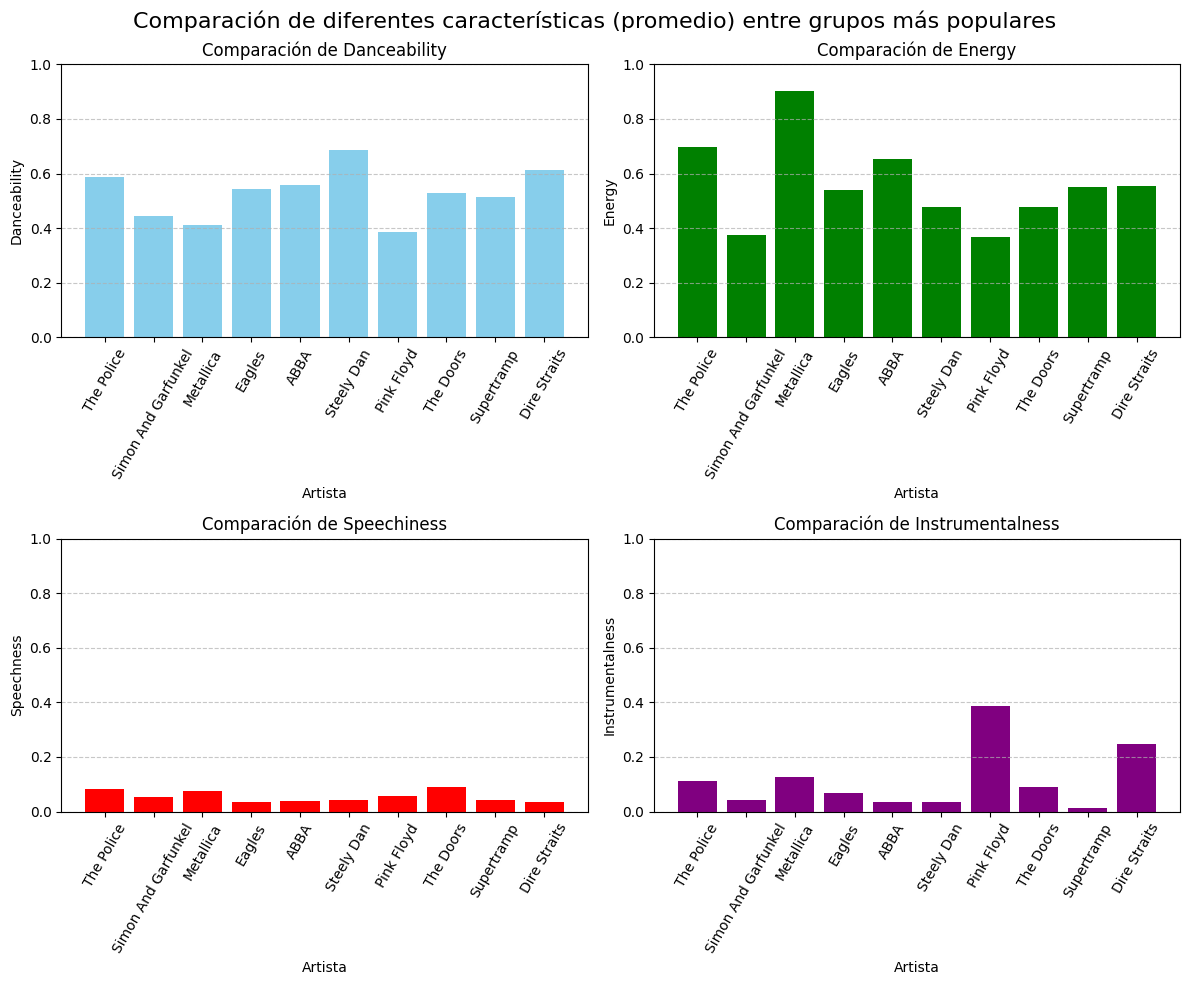

In [ ]:
# Crear una serie de subplots para mostrar comparativas entre las características de los 10 grupos más populares
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Primer subplot
axs[0, 0].bar(caracteristicas_grupos['Artist'], caracteristicas_grupos['Danceability'], color='skyblue')
axs[0, 0].set_title('Comparación de Danceability')
axs[0, 0].set_xlabel('Artista')
axs[0, 0].set_ylabel('Danceability')
axs[0, 0].set_ylim([0, 1])

# Segundo subplot
axs[0, 1].bar(caracteristicas_grupos['Artist'], caracteristicas_grupos['Energy'], color='green')
axs[0, 1].set_title('Comparación de Energy')
axs[0, 1].set_xlabel('Artista')
axs[0, 1].set_ylabel('Energy')
axs[0, 1].set_ylim([0, 1])

# Tercer subplot
axs[1, 0].bar(caracteristicas_grupos['Artist'], caracteristicas_grupos['Speechiness'], color='red')
axs[1, 0].set_title('Comparación de Speechiness')
axs[1, 0].set_xlabel('Artista')
axs[1, 0].set_ylabel('Speechness')
axs[1, 0].set_ylim([0, 1])

# Cuarto subplot
axs[1, 1].bar(caracteristicas_grupos['Artist'], caracteristicas_grupos['Instrumentalness'], color='purple')
axs[1, 1].set_title('Comparación de Instrumentalness')
axs[1, 1].set_xlabel('Artista')
axs[1, 1].set_ylabel('Instrumentalness')
axs[1, 1].set_ylim([0, 1])

fig.suptitle('Comparación de diferentes características (promedio) entre grupos más populares', fontsize=16)
for ax in axs.flat:
  ax.set_xticks(caracteristicas_grupos['Artist'])
  ax.set_xticklabels(caracteristicas_grupos['Artist'], rotation=60)
  ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Aquí tenemos la misma información para los 10 grupos más populares, en forma de gráficas para una representación más visual. Vemos lo que hemos comentado antes, que las canciones más populares tienden a tener valores de `Speechiness` y `Acousticness` bajos.

In [ ]:
df.drop(columns=['Track', 'Album', 'Year', 'Duration']).groupby('Artist').mean().reset_index().sort_values(by='Popularity', ascending=True).head(10)

Artist  Duration_int  Time_Signature  Danceability  \
58  Nitty Gritty Dirt Band    200.233480        3.947137      0.570564   
36                  Foghat    274.000000        3.952055      0.480425   
34              Eurythmics    261.810127        3.974684      0.579671   
18             Cheap Trick    223.317536        3.971564      0.475536   
52       Little River Band    265.933673        3.938776      0.577306   
66              Quiet Riot    257.858824        3.988235      0.437062   
38     Grand Funk Railroad    279.613208        3.962264      0.443972   
19                 Chicago    251.146893        3.929379      0.541977   
44      Jefferson Airplane    241.142857        3.940476      0.443810   
67         REO Speed Wagon    243.217391        3.981366      0.503186   

      Energy       Key   Loudness      Mode  Speechiness  Acousticness  \
58  0.570916  5.211454 -10.067167  0.898678     0.048882      0.348185   
36  0.789795  5.643836  -8.476452  0.821918     0.058465      0.070763   
34  0.717399  4.702532  -7.719019  0.746835     0.052780      0.148927   
18  0.801791  5.573460  -7.595934  0.890995     0.045512      0.072030   
52  0.658102  5.612245  -8.247439  0.801020     0.038749      0.189893   
66  0.837812  5.952941  -7.894518  0.658824     0.073971      0.068845   
38  0.786434  4.716981  -6.771123  0.783019     0.062628      0.092890   
19  0.670652  4.717514  -7.932240  0.748588     0.049518      0.209256   
44  0.522296  5.273810 -11.871238  0.702381     0.044537      0.317205   
67  0.773366  5.118012  -8.152385  0.819876     0.042072      0.120126   

    Instrumentalness  Liveness   Valence       Tempo  Popularity  
58          0.050313  0.194428  0.692793  122.172507    6.951542  
36          0.051402  0.210162  0.674329  129.281062    7.815068  
34          0.072752  0.245084  0.587060  122.609310   10.993671  
18          0.089226  0.260488  0.511322  132.078744   13.649289  
52          0.008836  0.193656  0.518156  124.563745   14.040816  
66          0.085475  0.260393  0.446173  118.675918   14.105882  
38          0.141457  0.223162  0.572288  129.399538   15.405660  
19          0.117762  0.210033  0.581873  120.878229   16.059322  
44          0.089211  0.180750  0.457056  117.911774   16.238095  
67          0.032735  0.216075  0.663882  126.602311   16.354037

Sin embargo, si estudiamos las mismas características de los grupos con menor media de popularidad, descubrimos que los valores son bastante parecidos. A simple vista, quizás podríamos decir que esta segunda tabla tiene valores más altos de `Energy` y `Mode`, y valores aún más pequeños de `Acousticness`.

Al haber tan poca diferencia, no podemos asegurar que estas medidas sean significativas.

### Por año

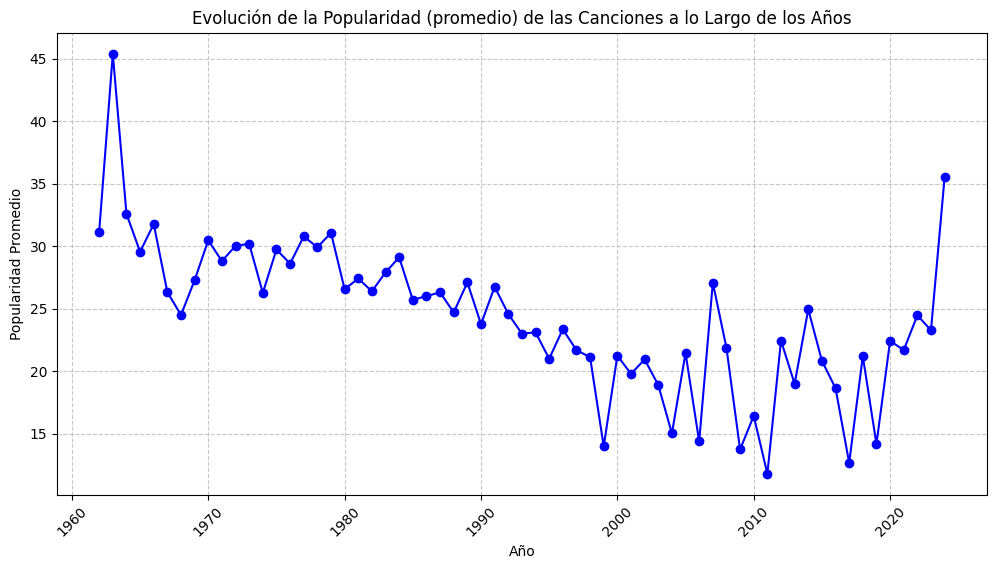

In [ ]:
# Calcular la popularidad promedio de las canciones por año
popularity_per_year = df.groupby('Year')['Popularity'].mean()

# Crear un gráfico de líneas para mostrar la evolución de la popularidad por años
plt.figure(figsize=(12, 6))
plt.plot(popularity_per_year.index, popularity_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Evolución de la Popularidad (promedio) de las Canciones a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Popularidad Promedio')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


Como hemos comentado en el apartado de correlación, parece ser que se tiende a tener idolatría por las canciones de los 90 o anteriores.

También hay un pico de popularidad en los últimos años, que podemos atribuir a que estas canciones sigan frescas en la mente de las personas: habría que ver si siguen siendo populares en el futuro.

In [ ]:
# Calcular promedio de Danceability, Energy, Speechiness, Instrumentalness y Acousticness por decada
decades = df[['Year', 'Danceability', 'Energy', 'Speechiness', 'Instrumentalness', 'Acousticness']].copy()
decades['Decade'] = (df['Year'] // 10) * 10
decades = decades.drop(columns=['Year']).groupby('Decade').mean().reset_index()
decades

Decade  Danceability    Energy  Speechiness  Instrumentalness  Acousticness
0    1960      0.468016  0.522033     0.054794          0.132759      0.391971
1    1970      0.488113  0.595015     0.052432          0.114175      0.286668
2    1980      0.530897  0.693345     0.050692          0.066344      0.164624
3    1990      0.511144  0.697958     0.048249          0.068125      0.171824
4    2000      0.508309  0.717301     0.050178          0.067583      0.183878
5    2010      0.486251  0.697642     0.051190          0.110384      0.225590
6    2020      0.504916  0.755706     0.055742          0.043366      0.152539

Como pasaba con los artistas, no parece haber una tendencia específica por década.

Las únicas características que parecen mostrar una tendencia, y lo comprobamos a continuación en las gráficas, son `Energy` y `Acousticness`, aunque no tengan un valor de correlación especialmente alto con `Year`.

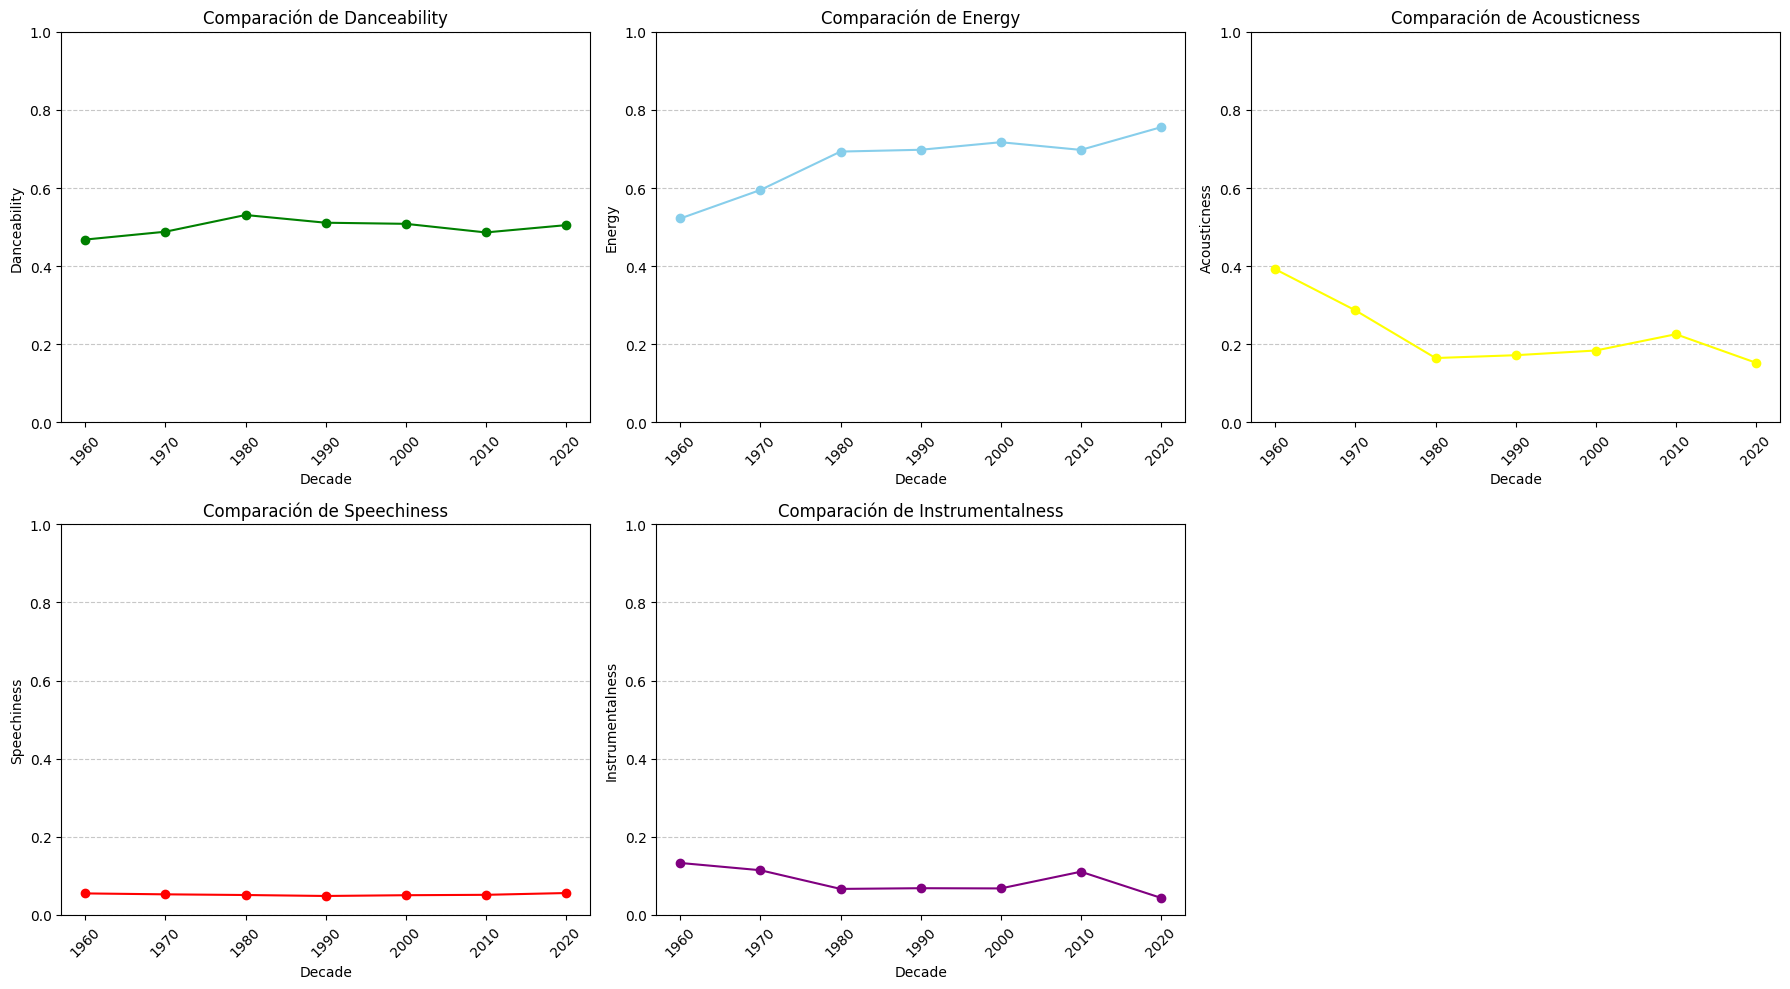

In [ ]:
# Crear una serie de subplots para mostrar comparativas características a lo largo de las décadas
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Primer subplot
axs[0, 0].plot(decades['Decade'], decades['Danceability'], marker='o', color='green')
axs[0, 0].set_title('Comparación de Danceability')
axs[0, 0].set_xlabel('Decade')
axs[0, 0].set_ylabel('Danceability')
axs[0, 0].set_ylim([0, 1])

# Segundo subplot
axs[0, 1].plot(decades['Decade'], decades['Energy'], marker='o', color='skyblue')
axs[0, 1].set_title('Comparación de Energy')
axs[0, 1].set_xlabel('Decade')
axs[0, 1].set_ylabel('Energy')
axs[0, 1].set_ylim([0, 1])

# Tercer subplot
axs[1, 0].plot(decades['Decade'], decades['Speechiness'], marker='o', color='red')
axs[1, 0].set_title('Comparación de Speechiness')
axs[1, 0].set_xlabel('Decade')
axs[1, 0].set_ylabel('Speechiness')
axs[1, 0].set_ylim([0, 1])

# Cuarto subplot
axs[1, 1].plot(decades['Decade'], decades['Instrumentalness'], marker='o', color='purple')
axs[1, 1].set_title('Comparación de Instrumentalness')
axs[1, 1].set_xlabel('Decade')
axs[1, 1].set_ylabel('Instrumentalness')
axs[1, 1].set_ylim([0, 1])

# Quinto subplot
axs[0, 2].plot(decades['Decade'], decades['Acousticness'], marker='o', color='yellow')
axs[0, 2].set_title('Comparación de Acousticness')
axs[0, 2].set_xlabel('Decade')
axs[0, 2].set_ylabel('Acousticness')
axs[0, 2].set_ylim([0, 1])

axs[1, 2].axis('off')

for ax in axs.flat:
  ax.set_xticks(decades['Decade'])
  ax.set_xticklabels(decades['Decade'], rotation=45)
  ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## DISTRIBUCIÓN DE DATOS

De cara al último apartado, la predicción, queremos intentar predecir la popularidad que tendrá una determinada canción a partir del resto de características del dataset.

Para asegurar unos buenos resultados, vamos a estudiar la distribución de canciones según `Popularity`.

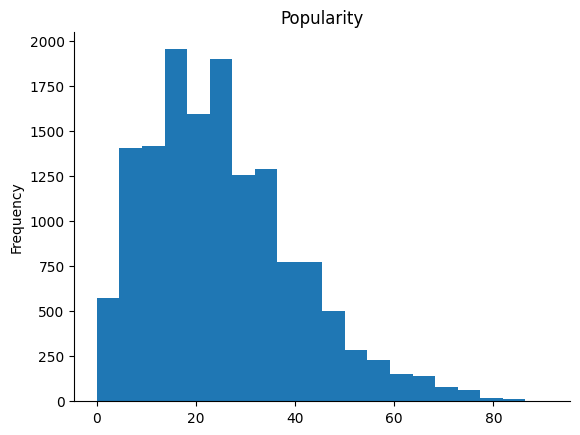

In [ ]:
# @title Popularity

from matplotlib import pyplot as plt
df['Popularity'].plot(kind='hist', bins=20, title='Popularity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
(df["Popularity"] // 10).value_counts().sort_index()

Popularity
0    1982
1    3763
2    3732
3    2506
4    1371
5     597
6     314
7     129
8      23
9       1
Name: count, dtype: int64

Vemos que la mayoría de las canciones tienen una popularidad de 40 para abajo, y solamente una su popularidad superior a 90.

Para equilibrar la distribución consideramos interesante hacer una subdivisión en clases, donde en lugar de realizar la predicción de un valor númerico clasifiquemos las canciones en categorías.

Si nuestro objetivo es predecir la popularidad de las canciones en un rango, o bien equilibramos cuántas muestras usamos de cada clase o debemos modificar la clasificación para que cada clase tenga aproximadamente el mismo número de muestras.

In [ ]:
popularity_classification = {"zero"     : 0,
                             "low"      : 0,
                             "medium"   : 0,
                             "high"     : 0,
                             "very-high": 0}
popularity_range = [0, 12, 20, 28, 40, float("+inf")]

# Contar cuántas canciones pertenecen a cada categoría
# y crear una nueva columna categórica para la popularidad
popularity_categories = []
for p in df.loc[:,"Popularity"]:
  if   p < popularity_range[1]:
    popularity_classification["zero"]+=1
    popularity_categories += [0]
  elif p < popularity_range[2]:
    popularity_classification["low"]+=1
    popularity_categories += [1]
  elif p < popularity_range[3]:
    popularity_classification["medium"]+=1
    popularity_categories += [2]
  elif p < popularity_range[4]:
    popularity_classification["high"]+=1
    popularity_categories += [3]
  else:
    popularity_classification["very-high"]+=1
    popularity_categories += [4]

# Insertar columna de popularidad categórica
df.insert(loc = 19,
          column = 'Popularity_cat',
          value = popularity_categories)

# Crear cadenas que describan el rango de cada categoría, para el gráfico siguiente
popularity_range_strings = []
for i in range(1, len(popularity_range)):
  popularity_range_strings += [f"[{popularity_range[i-1]}-{popularity_range[i]-1}]"]

df.head()

Track      Artist       Album  Year Duration  \
0      Play A Simple Song  38 Special  38 Special  1977     3:13   
1             Four Wheels  38 Special  38 Special  1977     4:43   
2                Fly Away  38 Special  38 Special  1977     5:13   
3          Tell Everybody  38 Special  38 Special  1977     4:09   
4  Just Wanna Rock & Roll  38 Special  38 Special  1977     5:57   

   Duration_int  Time_Signature  Danceability  Energy  Key  Loudness  Mode  \
0           193               4         0.521   0.367    0   -13.866     1   
1           283               4         0.535   0.710    2   -12.287     1   
2           313               4         0.563   0.563    2   -10.781     1   
3           249               4         0.638   0.694   11   -10.206     0   
4           357               4         0.388   0.701    2    -9.984     1   

   Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
0       0.0278        0.6920          0.000003    0.1080    0.789   83.412   
1       0.0428        0.0100          0.023000    0.0495    0.445  160.361   
2       0.0263        0.0357          0.001850    0.1400    0.564  106.739   
3       0.0310        0.1610          0.000034    0.0908    0.936  124.962   
4       0.0360        0.0130          0.042200    0.1150    0.769  126.769   

   Popularity  Popularity_cat  
0          16               1  
1          10               0  
2          13               1  
3          10               0  
4          11               0

Esta distribución hace que las clases estén mejor repartidas, si bien los rangos son bastante irregulares.


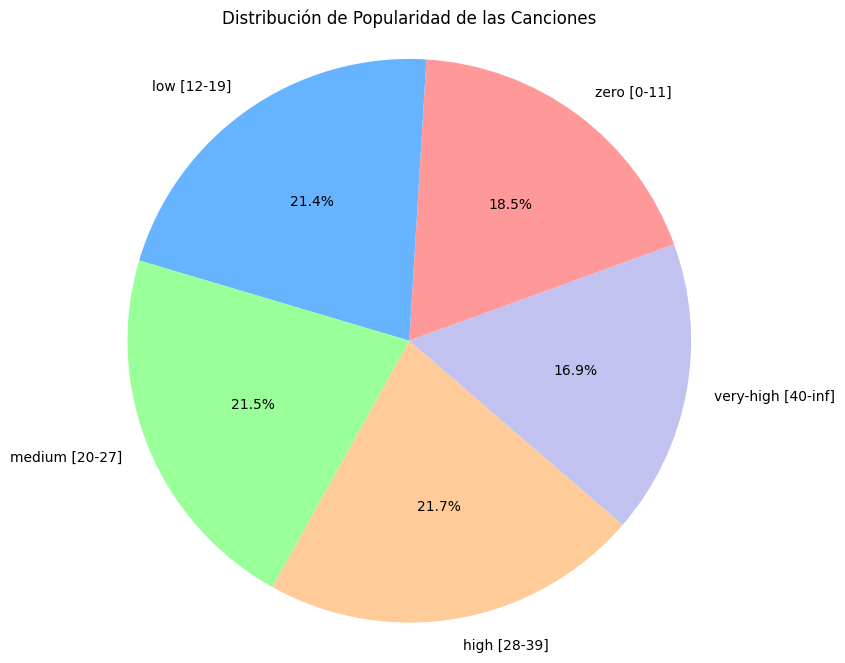

In [ ]:
# Datos para el gráfico pastel
labels = list(popularity_classification.keys())  # Etiquetas de la clasificación
labels = [i+" "+j for i, j in zip(labels, popularity_range_strings)] #Añadir el rango a las etiquetas de la clasificación
sizes = list(popularity_classification.values())  # Valores de la clasificación

# Crear el gráfico pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=20, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribución de Popularidad de las Canciones')
plt.axis('equal')
plt.show()

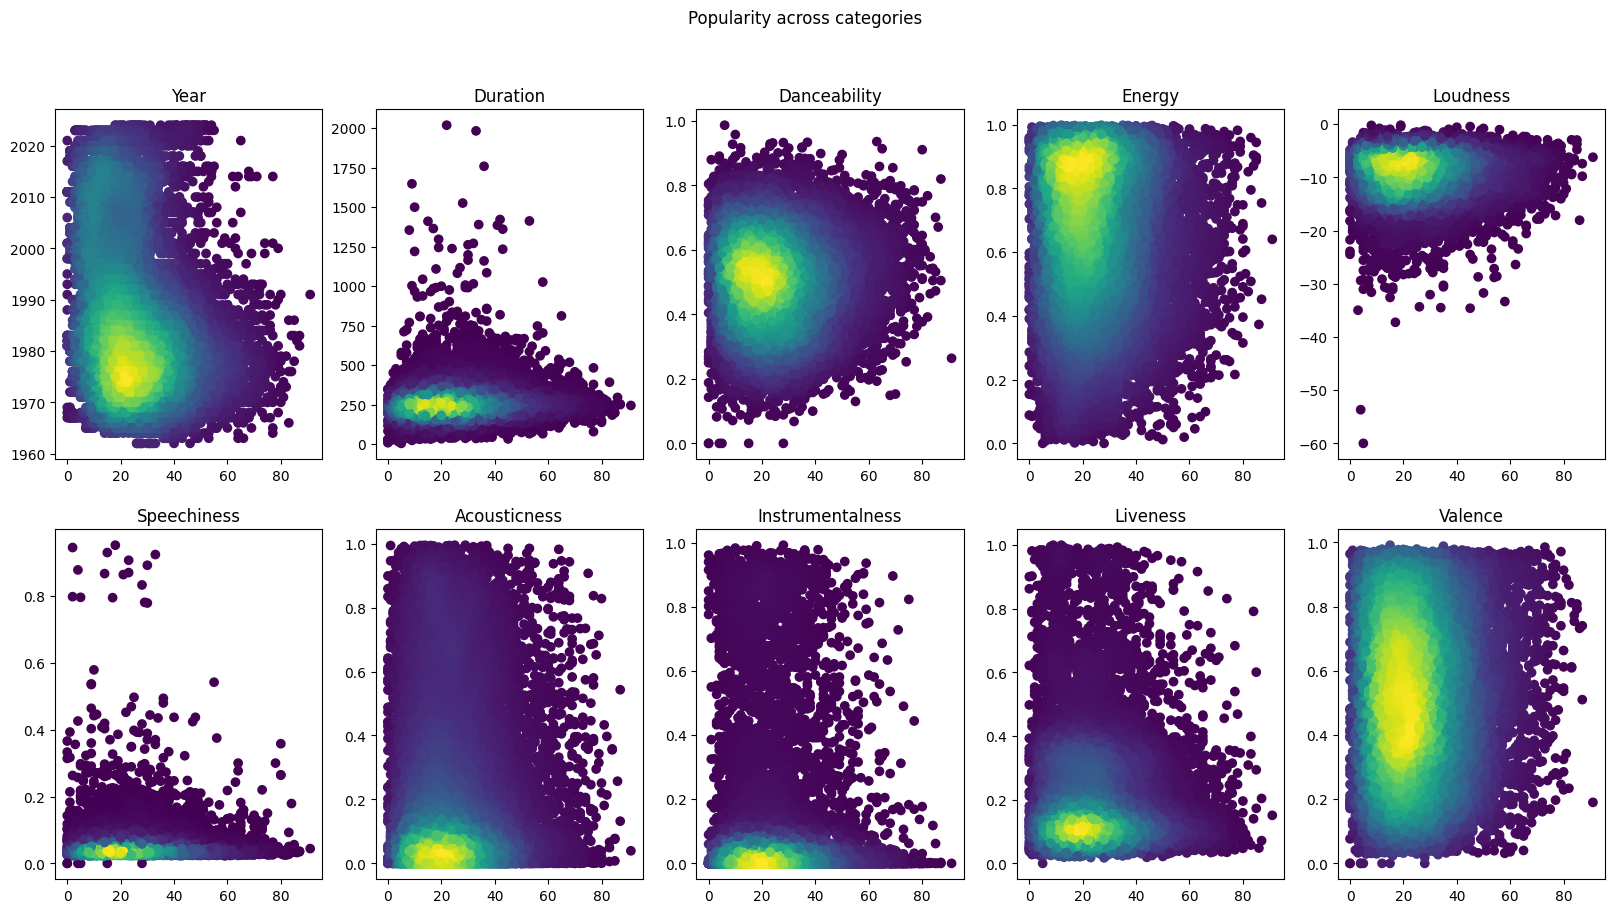

In [ ]:
# @title Comparativa de distribución de Popularity respecto al resto de características

from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

fig, (
    (ax1, ax2, ax3, ax4, ax5),
    (ax6, ax7, ax8, ax9, ax10),
    ) = plt.subplots(2, 5)
fig.suptitle('Popularity across categories')
fig.set_size_inches(20,10)

ax1.set_title('Year')
xy = np.vstack([df['Popularity'],df['Year']])
z = gaussian_kde(xy)(xy)
ax1.scatter(x=df['Popularity'], y=df['Year'], c=z)

ax2.set_title('Duration')
xy = np.vstack([df['Popularity'],df['Duration_int']])
z = gaussian_kde(xy)(xy)
ax2.scatter(x=df['Popularity'], y=df['Duration_int'], c=z)

ax3.set_title('Danceability')
xy = np.vstack([df['Popularity'],df['Danceability']])
z = gaussian_kde(xy)(xy)
ax3.scatter(x=df['Popularity'], y=df['Danceability'], c=z)

ax4.set_title('Energy')
xy = np.vstack([df['Popularity'],df['Energy']])
z = gaussian_kde(xy)(xy)
ax4.scatter(x=df['Popularity'], y=df['Energy'], c=z)

ax5.set_title('Loudness')
xy = np.vstack([df['Popularity'],df['Loudness']])
z = gaussian_kde(xy)(xy)
ax5.scatter(x=df['Popularity'], y=df['Loudness'], c=z)

ax6.set_title('Speechiness')
xy = np.vstack([df['Popularity'],df['Speechiness']])
z = gaussian_kde(xy)(xy)
ax6.scatter(x=df['Popularity'], y=df['Speechiness'], c=z)

ax7.set_title('Acousticness')
xy = np.vstack([df['Popularity'],df['Acousticness']])
z = gaussian_kde(xy)(xy)
ax7.scatter(x=df['Popularity'], y=df['Acousticness'], c=z)

ax8.set_title('Instrumentalness')
xy = np.vstack([df['Popularity'],df['Instrumentalness']])
z = gaussian_kde(xy)(xy)
ax8.scatter(x=df['Popularity'], y=df['Instrumentalness'], c=z)

ax9.set_title('Liveness')
xy = np.vstack([df['Popularity'],df['Liveness']])
z = gaussian_kde(xy)(xy)
ax9.scatter(x=df['Popularity'], y=df['Liveness'], c=z)

ax10.set_title('Valence')
xy = np.vstack([df['Popularity'],df['Valence']])
z = gaussian_kde(xy)(xy)
ax10.scatter(x=df['Popularity'], y=df['Valence'], c=z)

En general, ninguna gráfica tiene una distribución muy densa para valores altos de popularidad, debido a que hay pocas canciones que los tengan.

- Las características definidas como un valor entre 0 y 1 (`Danceability`, `Energy`, `Speechiness`, `Acousticness`, `Instrumentalness`, `Liveness` y `Valence`) tienen valores en todo su rango, excepto `Speechiness` que presenta valores bastante bajos en su mayoría.
- La mayoría de canciones dura entre 0 y 10 minutos (de 0 a 600 segundos).
- Dentro de cada categoría, las canciones con más popularidad tienen:
  - Alta energía
  - Bastante ruido
  - Poca `Speechiness`, `Acusticness`, `Instrumentalness` y `Liveness`
  - Alta valencia
- Sin embargo, no podemos asegurar que la canción ideal tenga todas estas características

# MODELO PREDICTIVO



Para esta última sección de contenidos vamos a probar varios modelos de predicción, con los que intentaremos predecir la popularidad de una cierta canción según el resto de columnas del dataset.

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=036fb6ebac3f811e838cf7d2fa0d54a6e55cdae3ac9a495b9dd9969b87d064cd
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


## Preparado de datos

Para el preparado de datos, comenzamos convirtiendo el dataframe de `pandas` (que nos ha sido muy útil para el análisis de datos) en otro de `pyspark` (librería que ya tiene diversos modelos predictivos implementados).

Utilizamos `pyspark` también para dropear las columnas no numéricas y normalizar los datos que sí lo son mediante las funciones que proporciona para ello.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, min, max
spark = SparkSession.builder.getOrCreate()

In [ ]:
df_spark = spark.createDataFrame(df)
df_spark.show()

+--------------------+----------+--------------------+----+--------+------------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+----------+--------------+
|               Track|    Artist|               Album|Year|Duration|Duration_int|Time_Signature|Danceability|Energy|Key|Loudness|Mode|Speechiness|Acousticness|Instrumentalness|Liveness|Valence|  Tempo|Popularity|Popularity_cat|
+--------------------+----------+--------------------+----+--------+------------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+----------+--------------+
|  Play A Simple Song|38 Special|          38 Special|1977|    3:13|         193|             4|       0.521| 0.367|  0| -13.866|   1|     0.0278|       0.692|         2.52E-6|   0.108|  0.789| 83.412|        16|             1|
|         Four Wheels|38 Special|          38 Special|1977|    4:43|         283|       

In [ ]:
def normalize_column(df, column_name):
    min_val = df.agg(min(col(column_name))).collect()[0][0]
    max_val = df.agg(max(col(column_name))).collect()[0][0]
    df = df.withColumn(column_name, (col(column_name) - min_val) / (max_val - min_val))
    return df

En este primer procesado de los datos hemos transformado las variables categóricas presentes en nuestro dataset, concretamente la columna `Year`, en un vector que representa el año concreto de la canción, de forma que nuestro modelo sea capaz de interpretarlo. Para ello, haremos uso de la clase `OneHotEncoder` que nos proporciona pyspark.

A continuación, eliminaremos del dataset aquellas columnas que no nos interese pasarle a nuestro modelo. Entre estas destacaremos las columnas que contienen cadenas de texto, ya que deseamos centrarnos en las características de la canción; y aquellas que contienen información dudosa como `Time_signature` y `Key`, tal y como se comentó en apartados anteriores.

Finalmente, realizaremos una normalización de aquellos datos que sean excesivamente altos, rebasando el intervalo [-1, 1]. Dentro de este grupo incluimos las columnas `Duration`, `Loudness`, `Tempo` y `Popularity`.

In [ ]:
from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder(inputCols=['Year'], outputCols =['YearVec'])
encoded =  encoder.fit(df_spark).transform(df_spark)

data_encoded = encoded.drop('Track','Artist','Album','Duration','Time_Signature','Key','Year')
data_encoded = data_encoded.withColumnRenamed('Popularity', 'target_reg')
data_encoded = data_encoded.withColumn('target_reg', col('target_reg') / 100)
data_encoded = data_encoded.withColumnRenamed('Popularity_cat', 'target_cat')

data_encoded = normalize_column(data_encoded, 'Duration_int')
data_encoded = data_encoded.withColumnRenamed('Duration_int', 'Duration')
data_encoded = normalize_column(data_encoded, 'Loudness')
data_encoded = data_encoded.withColumn('Loudness', col('Loudness') - 1)
data_encoded = normalize_column(data_encoded, 'Tempo')

data_encoded.show()

+-------------------+------------+------+--------------------+----+-----------+------------+----------------+--------+-------+-------------------+----------+----------+-------------------+
|           Duration|Danceability|Energy|            Loudness|Mode|Speechiness|Acousticness|Instrumentalness|Liveness|Valence|              Tempo|target_reg|target_cat|            YearVec|
+-------------------+------------+------+--------------------+----+-----------+------------+----------------+--------+-------+-------------------+----------+----------+-------------------+
|0.09384309831181728|       0.521| 0.367| -0.2284897235647273|   1|     0.0278|       0.692|         2.52E-6|   0.108|  0.789| 0.3491575796898219|      0.16|         1|(2024,[1977],[1.0])|
| 0.1385302879841112|       0.535|  0.71|-0.20208371657441004|   1|     0.0428|        0.01|           0.023|  0.0495|  0.445| 0.6712614328470666|       0.1|         0|(2024,[1977],[1.0])|
|0.15342601787487586|       0.563| 0.563|-0.17689850661

Utilizaremos la clase `VectorAssembler` para transformar todas las columnas de entrada a nuestro modelo en una única denominada 'features', de forma que su manejo resulte sencillo. Cabe destacar que planteamos tanto la posiblidad de utilizar todas las columnas en este proceso como únicamente las de `Energy` y `YearVec`. Tras la realización de las pruebas, observamos que los resultados obtenidos eran tremendamente similares, por lo que optamos por emplear todas las columnas en el entrenamiento de los modelos.

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols =['Duration','Danceability','Energy','Loudness','Mode','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','YearVec'],
                           outputCol="features")
#assembler = VectorAssembler(inputCols =['Energy','YearVec'],
#                            outputCol="features")
assembled = assembler.transform(data_encoded)

data_asb = assembled.select("features","target_reg","target_cat")
data_asb.head()

Row(features=SparseVector(2035, {0: 0.0938, 1: 0.521, 2: 0.367, 3: -0.2285, 4: 1.0, 5: 0.0278, 6: 0.692, 7: 0.0, 8: 0.108, 9: 0.789, 10: 0.3492, 1988: 1.0}), target_reg=0.16, target_cat=1)

Finalmente, haremos uso del algoritmo `PCA (Principal Component Analysis)` para reducir la dimensionalidad de nuestro conjunto de datos. Es decir, simplificaremos nuestro dataset, al mismo tiempo que mantenemos las características más importantes de los datos.

Las líneas que hacen referencia a la varianza explicada nos sirven para determinar la nueva dimensionalidad más apropiada. De esta manera, teniendo en cuenta la varianza explicada acumulada, en el momento en que lleguemos a alrededor de un 95%, podemos seleccionar ese valor de k para el algoritmo PCA. No hemos llegado a emplear esta técnica, aunque hemos creído conveniente dejar su código comentado junto a esta explicación.

In [ ]:
from pyspark.ml.feature import PCA

pca = PCA(k=12, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(data_asb).transform(data_asb)

# Mostrar la varianza explicada por cada componente principal
#explained_variance = pca.fit(data_asb).explainedVariance
#print("Varianza explicada por cada componente principal:")
#print(explained_variance)

# Mostrar la varianza explicada acumulada
#cumulative_variance = explained_variance.cumsum()
#print("Varianza explicada acumulada:")
#print(cumulative_variance)

data_pca = model.select("pcaFeatures","target_reg","target_cat")
data_pca.head()

Row(pcaFeatures=DenseVector([1.0502, 0.1009, -0.8861, -0.3079, 0.1965, 0.078, -0.0309, -0.1224, -0.0029, 0.0816, 0.1133, -0.1033]), target_reg=0.16, target_cat=1)

Por último, dividimos nuestros datos de forma aleatoria en dos conjuntos:
- `train_data` (70%): datos para los que nuestro modelo tendrá todas las columnas, a partir de los cuales aprenderá.
- `test_data` (30%): datos para los que no sabrá la columna `popularity` ni `popularity_cat`, y tratará de predecirlas.

In [ ]:
train_data, test_data = data_pca.randomSplit([.7,.3],seed=1234)

## Regresión lineal

El modelo de regresión lineal tratará de predecir el valor de la columna `prediction` tal cuál. Para ello usaremos el modelo `pyspark.LinearRegression` y calcularemos la raíz cuadrada de la media de los errores como medida de evaluación.

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize
lr = LinearRegression(labelCol="target_reg", featuresCol="pcaFeatures")
# Fit the data to the model
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)
# Calculate rmse
evaluator = RegressionEvaluator(labelCol='target_reg', predictionCol='prediction', metricName='rmse')
lr_rmse = evaluator.evaluate(lr_predictions)
print('Test RMSE = ', lr_rmse)

Test RMSE =  0.14956183071800486


In [ ]:
lr_predictions = lr_model.transform(test_data)
lr_predictions.show()

+--------------------+----------+----------+-------------------+
|         pcaFeatures|target_reg|target_cat|         prediction|
+--------------------+----------+----------+-------------------+
|[-0.0580612135313...|      0.46|         4|0.22229499726139287|
|[-0.0506244648064...|      0.24|         2| 0.2443360425742911|
|[-0.0439834083959...|      0.29|         3|0.23997097130047987|
|[-0.0366121753596...|      0.37|         3|  0.229002016321189|
|[-0.0362417486103...|      0.47|         4|0.24001191125730081|
|[-0.0360825899209...|      0.11|         0| 0.2376380250745231|
|[-0.0359538972677...|      0.09|         0| 0.2532504499452595|
|[-0.0358463397413...|      0.31|         3|0.23900025899363614|
|[-0.0358171906621...|       0.2|         2| 0.2503859248722716|
|[-0.0357176689198...|      0.24|         2|0.23393490824901797|
|[-0.0356395351543...|      0.21|         2| 0.2364795290532733|
|[-0.0354747539136...|      0.12|         1| 0.2521971347995472|
|[-0.0337697847782...|   

Vemos que este modelo obtiene un error de 0.1496, muy pequeño, lo cuál podría hacernos pensar que es muy bueno.

Sin embargo, si miramos las predicciones vemos que no es el caso. Lo que ha aprendido el modelo es a predecir una popularidad de aproximadamente 24 (normalizado entre 0 y 1: 0.24) para todas las canciones. Como la inmensa mayoría de los datos tiene una popularidad de alrededor de este valor, hace que el RMSE salga muy bajo.

Esta es una característica que tendrán todos los modelos de regresión que utilicemos: obtendrán errores mínimos sin a penas haber aprendido nada. Es por esto por lo que diseñamos la categorización de la popularidad.

 ## Regresor de árbol de decisión

A continuación probamos con un regresor de árbol de decisión. La diferencia con el anterior son las operaciones que realiza de forma interna, pero su resultado también es un número decimal que trata de aproximarse a la popularidad de la canción.

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize
dt = DecisionTreeRegressor(labelCol="target_reg", featuresCol="pcaFeatures")
# Fit the data to the model
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)
# Calculate rmse
evaluator = RegressionEvaluator(labelCol='target_reg', predictionCol='prediction', metricName='rmse')
dt_rmse = evaluator.evaluate(dt_predictions)
print('Test RMSE = ', dt_rmse)

Test RMSE =  0.14769298594237004


In [ ]:
dt_predictions = dt_model.transform(test_data)
dt_predictions.show()

+--------------------+----------+----------+-------------------+
|         pcaFeatures|target_reg|target_cat|         prediction|
+--------------------+----------+----------+-------------------+
|[-0.0580612135313...|      0.46|         4|0.34416666666666657|
|[-0.0506244648064...|      0.24|         2| 0.2684090909090909|
|[-0.0439834083959...|      0.29|         3|0.24812545587162652|
|[-0.0366121753596...|      0.37|         3|0.24812545587162652|
|[-0.0362417486103...|      0.47|         4|0.24812545587162652|
|[-0.0360825899209...|      0.11|         0| 0.2232060390763765|
|[-0.0359538972677...|      0.09|         0| 0.2232060390763765|
|[-0.0358463397413...|      0.31|         3|0.24812545587162652|
|[-0.0358171906621...|       0.2|         2| 0.2232060390763765|
|[-0.0357176689198...|      0.24|         2|0.24812545587162652|
|[-0.0356395351543...|      0.21|         2|0.24812545587162652|
|[-0.0354747539136...|      0.12|         1| 0.2232060390763765|
|[-0.0337697847782...|   

Observamos la misma tendencia a predecir un valor alrededor de 0.23 para la mayoría de las muestras.

si nos fijamos, el primer ejemplo tiene una popularidad de 46 y precide 34.4, un valor bastante más cercano y diferente del habitural 0.23. Sin embargo, no termina de aprender bien porque no repite esta tendencia para otras filas.

## Regresor de *random forest*

Para evitar que todos los ejemplos fueran iguales, cambiando solo la clase de nuestro regresor, para este apartado hemos probado algo poco convencional: hemos usado un modelo regresor para predecir las clases de `popularity_cat`.

Aunque no es el método ideal, hemos considerado que es un experimento interesante.

Nuestro conejillo de indias es el regresor de *random forest*.

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize
rf = RandomForestRegressor(labelCol="target_cat", featuresCol="pcaFeatures")
# Fit the data to the model
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)
# Calculate accuracy
evaluator = RegressionEvaluator(labelCol='target_cat', predictionCol='prediction', metricName='rmse')
rf_rmse = evaluator.evaluate(rf_predictions)
print('Test RMSE = ', rf_rmse)

Test RMSE =  1.3251105419463876


In [ ]:
rf_predictions = rf_model.transform(test_data)
rf_predictions.show()

+--------------------+----------+----------+------------------+
|         pcaFeatures|target_reg|target_cat|        prediction|
+--------------------+----------+----------+------------------+
|[-0.0580612135313...|      0.46|         4|1.8166488215753158|
|[-0.0506244648064...|      0.24|         2| 2.346819816981112|
|[-0.0439834083959...|      0.29|         3|1.8295023938739086|
|[-0.0366121753596...|      0.37|         3| 2.056469459194848|
|[-0.0362417486103...|      0.47|         4|1.7753700577618343|
|[-0.0360825899209...|      0.11|         0| 1.838305039582431|
|[-0.0359538972677...|      0.09|         0|1.8339064751825336|
|[-0.0358463397413...|      0.31|         3| 1.781755534882467|
|[-0.0358171906621...|       0.2|         2| 1.884211302377997|
|[-0.0357176689198...|      0.24|         2|1.9960403169687086|
|[-0.0356395351543...|      0.21|         2| 2.052942254525653|
|[-0.0354747539136...|      0.12|         1|1.8799904619614711|
|[-0.0337697847782...|      0.33|       

En este caso tratamos de predecir `popularity_cat` que, como hemos comentado previamente, es una clasificación que va del 0 (nada popular) al 4 (muy popular) con los siguientes porcentajes de muestras:
- 0: 18.5%
- 1: 21.4%
- 2: 21.5%
- 3: 21.7%
- 4: 16.9%

Si hacemos la media de las clases, el resultado que obtenemos es `1.971`.

Las prediciones del modelo se centran alrededor de este valor, con un RMSE de `1.325`.
- 1.971 - 1.325 = 0.646 ~= 0 (valor mínimo posible)
- 1.971 + 1.325 = 3.296 ~= 4 (valor máximo posible)

Con este experimento vemos que, aunque el error que nos aparece es mucho mayor (porque `popularity_cat` se mueve en el rango [0:4] mientras que `popularity` toma valores de [0:1]), nuestro modelo es igual de malo: no aprende nada.

## Regresor logístico

Este regresor se diferencia de los anteriores en cuanto a que se comporta como un clasificador, prediciendo la probabilidad de que un ejemplo dado pertenezca a cada clase y seleccionando la que mayor probabilidad tenga.

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize
lr = LogisticRegression(labelCol="target_cat", featuresCol="pcaFeatures", maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")
# Fit the data to the model
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='target_cat', predictionCol='prediction', metricName='accuracy')
lr_accuracy = evaluator.evaluate(lr_predictions)
print('Test Accuracy = ', lr_accuracy)

Test Accuracy =  0.19695550351288058


In [ ]:
lr_predictions = lr_model.transform(test_data)
lr_predictions.show()

+--------------------+----------+----------+--------------------+--------------------+----------+
|         pcaFeatures|target_reg|target_cat|       rawPrediction|         probability|prediction|
+--------------------+----------+----------+--------------------+--------------------+----------+
|[-0.0580612135313...|      0.46|         4|[-0.0695723847317...|[0.18565270507325...|       1.0|
|[-0.0506244648064...|      0.24|         2|[-0.0695723847317...|[0.18565270507325...|       1.0|
|[-0.0439834083959...|      0.29|         3|[-0.0695723847317...|[0.18565270507325...|       1.0|
|[-0.0366121753596...|      0.37|         3|[-0.0695723847317...|[0.18565270507325...|       1.0|
|[-0.0362417486103...|      0.47|         4|[-0.0695723847317...|[0.18565270507325...|       1.0|
|[-0.0360825899209...|      0.11|         0|[-0.0695723847317...|[0.18565270507325...|       1.0|
|[-0.0359538972677...|      0.09|         0|[-0.0695723847317...|[0.18565270507325...|       1.0|
|[-0.0358463397413..

In [ ]:
print(f"rawPrediction: {lr_predictions.collect()[0]['rawPrediction']}")
print(f"probability:   {lr_predictions.collect()[0]['probability']}")
print(f"prediction:    {lr_predictions.collect()[0]['prediction']}")

Raw prediction: [-0.06957238473175217,0.1035019556075681,0.05923384782298034,0.06806063994561305,-0.1612240586444093]
Probability:    [0.18565270507325124,0.22073261710648273,0.2111743264121432,0.21304656908558872,0.16939378232253421]
Prediction:     1.0


La salida de nuestro modelo consiste en tres columnas:
- `rawPrediction`: cuánta confianza tiene en que sea una determinada clase, y la suma de todas da 0.
- `probability`: probabilidad de que una muestra pertenezca a cada clase; su suma da 1.
- `prediction`: clase predicha, seleccionando la más probable.

El único problema con este modelo es, una vez más, que no llega a aprender nada. Calcula la misma probabilidad para todas las muestras, prediciendo siempre la clase 1. Esto hace que tenga un acierto del 19.7%, que coincidirá con el número de muestras de esta clase que existan en el conjunto de datos de test.

## Clasificador de árbol de decisión

Pasamos ahora a un par de ejemplos de clasificadores, comenzando por el clasificador de árbol de decisión.

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize
dt = DecisionTreeClassifier(labelCol="target_cat", featuresCol="pcaFeatures")
# Fit the data to the model
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='target_cat', predictionCol='prediction', metricName='accuracy')
dt_accuracy = evaluator.evaluate(dt_predictions)
print('Test Accuracy = ', dt_accuracy)

Test Accuracy =  0.23138173302107728


In [ ]:
dt_predictions = dt_model.transform(test_data)
dt_predictions.show()

+--------------------+----------+----------+--------------------+--------------------+----------+
|         pcaFeatures|target_reg|target_cat|       rawPrediction|         probability|prediction|
+--------------------+----------+----------+--------------------+--------------------+----------+
|[-0.0580612135313...|      0.46|         4|[2.0,1.0,1.0,9.0,...|[0.13333333333333...|       3.0|
|[-0.0506244648064...|      0.24|         2|[26.0,59.0,59.0,1...|[0.07926829268292...|       3.0|
|[-0.0439834083959...|      0.29|         3|[1265.0,1336.0,12...|[0.21950373069581...|       1.0|
|[-0.0366121753596...|      0.37|         3|[1265.0,1336.0,12...|[0.21950373069581...|       1.0|
|[-0.0362417486103...|      0.47|         4|[1265.0,1336.0,12...|[0.21950373069581...|       1.0|
|[-0.0360825899209...|      0.11|         0|[1265.0,1336.0,12...|[0.21950373069581...|       1.0|
|[-0.0359538972677...|      0.09|         0|[1265.0,1336.0,12...|[0.21950373069581...|       1.0|
|[-0.0358463397413..

Como en el ejemplo anterior, calcula las probabilidades de que cada muestra pertenezca a cada clase y selecciona la más probable.

Aunque sigue mostrando una predilección por el 1, vemos que sí aprende algo y mejora ligeramente su acierto al 23.1%.

## Clasificador de *random forest*

A continuación probamos un clasificador de *random forest*.



In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize
rf = RandomForestClassifier(labelCol="target_cat", featuresCol="pcaFeatures")
# Fit the data to the model
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='target_cat', predictionCol='prediction', metricName='accuracy')
rf_accuracy = evaluator.evaluate(rf_predictions)
print('Test Accuracy = ', rf_accuracy)

Test Accuracy =  0.23840749414519907


In [ ]:
rf_predictions = rf_model.transform(test_data)
rf_predictions.show()

+--------------------+----------+----------+--------------------+--------------------+----------+
|         pcaFeatures|target_reg|target_cat|       rawPrediction|         probability|prediction|
+--------------------+----------+----------+--------------------+--------------------+----------+
|[-0.0580612135313...|      0.46|         4|[4.72262154621972...|[0.23613107731098...|       3.0|
|[-0.0506244648064...|      0.24|         2|[2.31028166769185...|[0.11551408338459...|       3.0|
|[-0.0439834083959...|      0.29|         3|[3.73885448448504...|[0.18694272422425...|       2.0|
|[-0.0366121753596...|      0.37|         3|[2.82052348791964...|[0.14102617439598...|       3.0|
|[-0.0362417486103...|      0.47|         4|[3.80550478427767...|[0.19027523921388...|       3.0|
|[-0.0360825899209...|      0.11|         0|[3.58544511033895...|[0.17927225551694...|       3.0|
|[-0.0359538972677...|      0.09|         0|[3.26834470409343...|[0.16341723520467...|       1.0|
|[-0.0358463397413..

Sobre tener las mismas características que los clasificadores anteriores, este muestra más predilección por la clase número 3. Obtiene un `accuracy` similar, del 23.8%.

## Clasificador de Bayes ingenuo

El último modelo predictivo que probamos en este trabajo es un clasificador de Bayes ingenuo.

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize
nb = NaiveBayes(labelCol="target_cat", featuresCol="pcaFeatures", smoothing=1.0, modelType="gaussian")
# Fit the data to the model
nb_model = nb.fit(train_data)
nb_predictions = nb_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='target_cat', predictionCol='prediction', metricName='accuracy')
nb_accuracy = evaluator.evaluate(nb_predictions)
print('Test Accuracy = ', nb_accuracy)

Test Accuracy =  0.22131147540983606


In [ ]:
nb_predictions = nb_model.transform(test_data)
nb_predictions.show()

+--------------------+----------+----------+--------------------+--------------------+----------+
|         pcaFeatures|target_reg|target_cat|       rawPrediction|         probability|prediction|
+--------------------+----------+----------+--------------------+--------------------+----------+
|[-0.0580612135313...|      0.46|         4|[-7.1867092924786...|[0.06537785639399...|       3.0|
|[-0.0506244648064...|      0.24|         2|[10.6686933086077...|[0.25576784671063...|       1.0|
|[-0.0439834083959...|      0.29|         3|[12.3428547279788...|[0.31602740924679...|       0.0|
|[-0.0366121753596...|      0.37|         3|[-3.0931739308832...|[0.00356390054129...|       4.0|
|[-0.0362417486103...|      0.47|         4|[13.2336313590312...|[0.31372471769087...|       0.0|
|[-0.0360825899209...|      0.11|         0|[9.75409947990418...|[0.21615723733059...|       1.0|
|[-0.0359538972677...|      0.09|         0|[12.1117833839372...|[0.24011606837658...|       1.0|
|[-0.0358463397413..

Aunque este clasificador muestra más diversidad en sus respuestas, sigue obteniendo un acierto similar, del 22.1%.

# CONCLUSIONES

Una tendencia que hemos notado a lo largo de los diferentes estudios de datos que hemos hecho es que la popularidad no parece tener una fuerte correlación con ninguna de las columnas que tiene el dataset. Esto puede haber sido la causa de que obtengamos tan pocos aciertos en la predicción con los diferentes modelos que hemos probado.

Vamos a proponer un último estudio sobre la columna `Popularity_cat`, para comprobar este fenómeno.

In [ ]:
mean_per_popularity_cat = df.drop(columns=['Track', 'Artist', 'Album', 'Year', 'Duration']).groupby('Popularity_cat').mean().reset_index().sort_values(by='Popularity', ascending=True).head(10)
mean_per_popularity_cat

Popularity_cat  Duration_int  Time_Signature  Danceability    Energy  \
0               0    243.236111        3.916291      0.520406  0.667009   
1               1    258.393379        3.905550      0.502741  0.643292   
2               2    262.573961        3.927812      0.497198  0.664612   
3               3    266.901116        3.908772      0.489858  0.658125   
4               4    270.576591        3.933881      0.508973  0.649656   

        Key  Loudness      Mode  Speechiness  Acousticness  Instrumentalness  \
0  5.215841 -9.081567  0.763138     0.051973      0.218522          0.086945   
1  5.270367 -9.799348  0.726712     0.049731      0.236640          0.098770   
2  5.104415 -9.396131  0.717048     0.051336      0.218435          0.093016   
3  5.105263 -9.485325  0.722807     0.054124      0.225559          0.096151   
4  5.139630 -9.367166  0.724435     0.049186      0.236401          0.068602   

   Liveness   Valence       Tempo  Popularity  
0  0.228574  0.540875  122.771949    7.022898  
1  0.205791  0.522207  122.518884   15.543006  
2  0.209463  0.524063  122.396088   23.445375  
3  0.212973  0.519819  123.051341   32.876874  
4  0.195729  0.541637  122.439714   50.809035

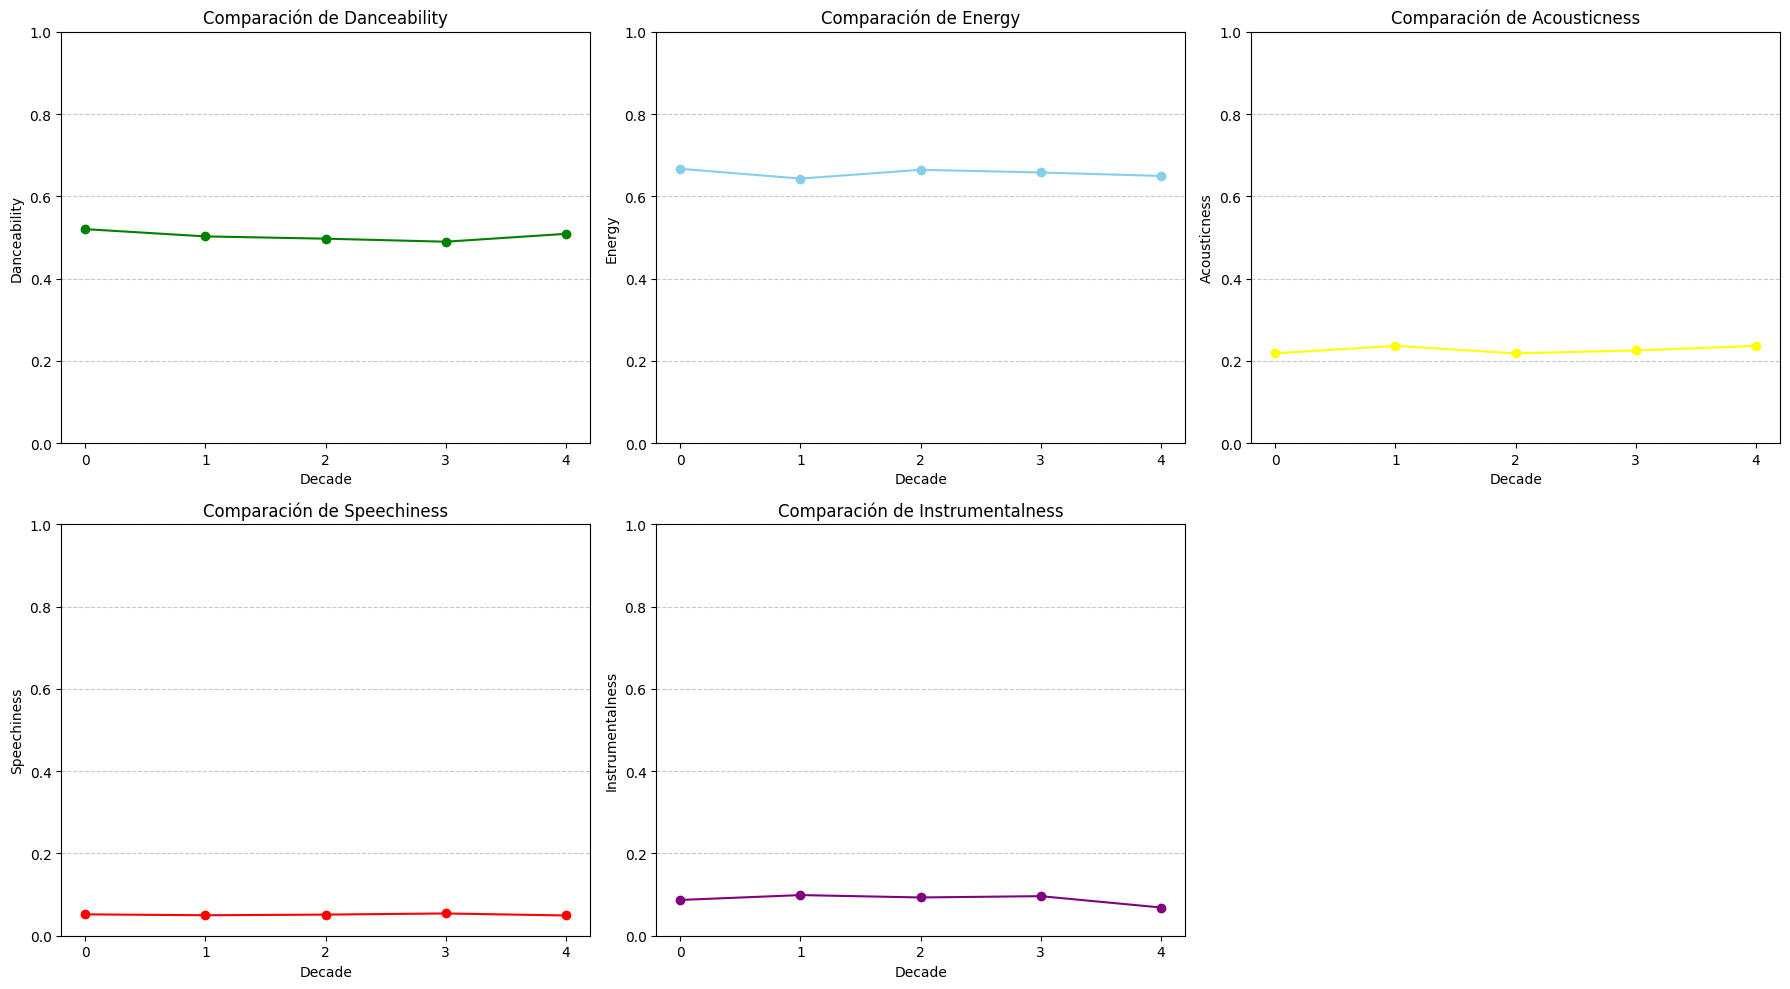

In [ ]:
# Crear una serie de subplots para mostrar comparativas características a lo largo de las décadas
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Primer subplot
axs[0, 0].plot(mean_per_popularity_cat['Popularity_cat'], mean_per_popularity_cat['Danceability'], marker='o', color='green')
axs[0, 0].set_title('Comparación de Danceability')
axs[0, 0].set_xlabel('Decade')
axs[0, 0].set_ylabel('Danceability')
axs[0, 0].set_ylim([0, 1])

# Segundo subplot
axs[0, 1].plot(mean_per_popularity_cat['Popularity_cat'], mean_per_popularity_cat['Energy'], marker='o', color='skyblue')
axs[0, 1].set_title('Comparación de Energy')
axs[0, 1].set_xlabel('Decade')
axs[0, 1].set_ylabel('Energy')
axs[0, 1].set_ylim([0, 1])

# Tercer subplot
axs[1, 0].plot(mean_per_popularity_cat['Popularity_cat'], mean_per_popularity_cat['Speechiness'], marker='o', color='red')
axs[1, 0].set_title('Comparación de Speechiness')
axs[1, 0].set_xlabel('Decade')
axs[1, 0].set_ylabel('Speechiness')
axs[1, 0].set_ylim([0, 1])

# Cuarto subplot
axs[1, 1].plot(mean_per_popularity_cat['Popularity_cat'], mean_per_popularity_cat['Instrumentalness'], marker='o', color='purple')
axs[1, 1].set_title('Comparación de Instrumentalness')
axs[1, 1].set_xlabel('Decade')
axs[1, 1].set_ylabel('Instrumentalness')
axs[1, 1].set_ylim([0, 1])

# Quinto subplot
axs[0, 2].plot(mean_per_popularity_cat['Popularity_cat'], mean_per_popularity_cat['Acousticness'], marker='o', color='yellow')
axs[0, 2].set_title('Comparación de Acousticness')
axs[0, 2].set_xlabel('Decade')
axs[0, 2].set_ylabel('Acousticness')
axs[0, 2].set_ylim([0, 1])

axs[1, 2].axis('off')

for ax in axs.flat:
  ax.set_xticks(mean_per_popularity_cat['Popularity_cat'])
  ax.set_xticklabels(mean_per_popularity_cat['Popularity_cat'])
  ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Efectivamente, comprobamos que todas las categorías tienen valores medios muy similares en las diferentes columnas.

Puede ser que mejores valores para predecir la popularidad pudieran ser métricas como `Número de oyentes mensuales del grupo` o `Mes en el que se publica la canción`, que son datos de los que Spotify también dispone.

# TRABAJO A FUTURO

Posibles ampliaciones de este trabajo:
- Probar a estandarizar los datos
- Utilizar columnas de las que no disponemos actualmente, como las mencionadas anteriormente en las conclusiones
- Implementar nuevos modelos predictivos
- Estudiar si las mismas tendencias se cumplen en otros géneros musicales